In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF
# Empirical CDF
from scipy.stats import norm

In [ ]:
sehwag= pd.read_csv("sehwag.csv")
dravid= pd.read_csv("dravid.csv")

In [ ]:
sehwag.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731


In [ ]:
dravid.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,3,-,4,0,0,75.00,4,caught,1,NaN,v Sri Lanka,Singapore,3 Apr 1996,ODI # 1089
1,4,-,7,0,0,57.14,4,run out,1,NaN,v Pakistan,Singapore,5 Apr 1996,ODI # 1091
2,3,-,5,0,0,60.00,5,caught,2,NaN,v Pakistan,Sharjah,12 Apr 1996,ODI # 1094
3,11,28,21,0,0,52.38,8,caught,2,NaN,v South Africa,Sharjah,14 Apr 1996,ODI # 1097
4,22,21,15,3,0,146.66,6,not out,1,NaN,v England,Manchester,26 May 1996,ODI # 1104


In [ ]:
sehwag.shape

(245, 14)

In [ ]:
sehwag["Runs"].describe()

count    245.000000
mean      33.767347
std       34.809419
min        0.000000
25%        8.000000
50%       23.000000
75%       46.000000
max      219.000000
Name: Runs, dtype: float64

In [ ]:
Q1= np.percentile(sehwag["Runs"], 25)#25th percentile or Q1
Q1

8.0

In [ ]:
Q2= np.percentile(sehwag["Runs"], 50)
Q2
# 50th percentile

23.0

In [ ]:
Q3= np.percentile(sehwag["Runs"], 75)
Q3
# 75th percentile

46.0

In [ ]:
np.max(sehwag["Runs"])
# maximum runs scored by sehwag

219

In [ ]:
IQR= Q3 - Q1
# it shows the range of boxplot(75-25)

In [ ]:
print(IQR)

38.0


<Axes: >

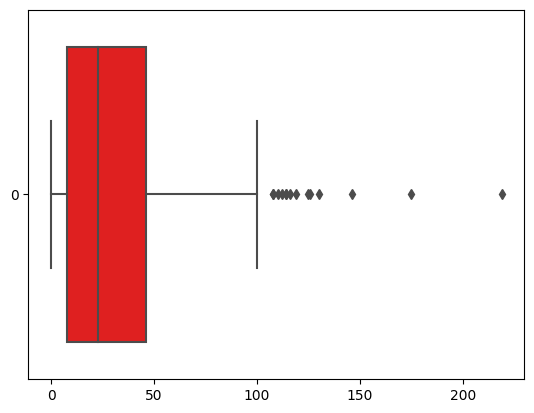

In [ ]:
sns.boxplot(data= sehwag["Runs"], color= "red", orient= "h")
# Outliers shows here
# Here more randomness in score observed

In [ ]:
L= max(0, Q1-1.5*IQR)

In [ ]:
U= Q3 + IQR*1.5

In [ ]:
L,U

(0, 103.0)

In [ ]:
sehwag_outlier = sehwag[sehwag['Runs'] > U]

In [ ]:
len(sehwag_outlier)

14

In [ ]:
sehwag_hundred = sehwag[sehwag["Runs"] >= 100]
len(sehwag_hundred)
# 14 hundred scored by sehwag in last 245 matches

15

In [ ]:
sehwag_hundred

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
12,100,97,70,19,1,142.85,2,bowled,2,NaN,v New Zealand,Colombo (SSC),2 Aug 2001,ODI # 1743
37,126,136,104,21,1,121.15,1,caught,2,NaN,v England,Colombo (RPS),22 Sep 2002,ODI # 1884
43,114,-,82,17,2,139.02,2,not out,2,NaN,v West Indies,Rajkot,12 Nov 2002,ODI # 1895
49,108,160,119,9,2,90.75,2,run out,2,NaN,v New Zealand,Napier,29 Dec 2002,ODI # 1927
53,112,175,139,11,3,80.57,2,caught,2,NaN,v New Zealand,Auckland,11 Jan 2003,ODI # 1933
75,130,193,134,15,2,97.01,1,caught,1,NaN,v New Zealand,Hyderabad (Deccan),15 Nov 2003,ODI # 2062
104,108,156,95,9,3,113.68,1,bowled,1,NaN,v Pakistan,Kochi,2 Apr 2005,ODI # 2235
163,114,127,87,17,3,131.03,3,caught,1,NaN,v Bermuda,Port of Spain,19 Mar 2007,ODI # 2542
182,119,150,95,12,5,125.26,2,caught,2,NaN,v Pakistan,Karachi,26 Jun 2008,ODI # 2717
192,116,165,90,17,0,128.88,1,run out,1,NaN,v Sri Lanka,Colombo (RPS),3 Feb 2009,ODI # 2813


In [ ]:
outlier_percentage= (14/245)*100
outlier_percentage

5.714285714285714

In [ ]:
dravid["Runs"].describe()

count    318.000000
mean      34.242138
std       29.681822
min        0.000000
25%       10.000000
50%       26.000000
75%       54.000000
max      153.000000
Name: Runs, dtype: float64

In [ ]:
# p_25= np.percentile(dravid["Runs"], 25)

In [ ]:
# Also by useing quantile
p_25 = dravid["Runs"].quantile(0.25) # Q1 or p_25
p_50 = dravid["Runs"].quantile(0.5)  # Q2 or p_50 or median
p_75 = dravid["Runs"].quantile(0.75) # Q3 or p_75
print(p_25, p_50, p_75)

10.0 26.0 54.0


In [ ]:
np.max(dravid["Runs"])

153

In [ ]:
IQRd= p_75 - p_25
IQRd

44.0

<Axes: >

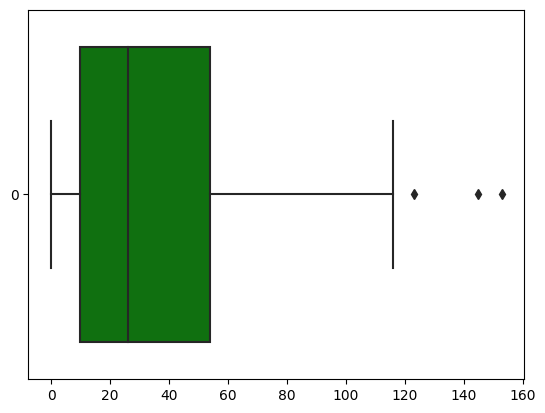

In [ ]:
sns.boxplot(data=dravid["Runs"], orient="h", color= "g")
# less outliers

In [ ]:
lower = max(p_25 - 1.5*IQRd, 0)
upper = p_75 + 1.5*IQRd
print(lower, upper)
# more consistent then sehwag

0 120.0


In [ ]:
dravid_outlier = dravid[dravid["Runs"] > upper]
len(dravid_outlier)

3

In [ ]:
len(dravid[dravid["Runs"] >= 100])
# 12 hundreds

12

In [ ]:
(3 / 318)*100
# very much less than sehwag

0.9433962264150944

In [ ]:
df_hw = pd.read_csv("weight-height.csv")
df_hw

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
df_hw["Height"].describe() #inch

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [ ]:
df_height = df_hw["Height"]

In [ ]:
min_height = df_height.min()

In [ ]:
max_height = df_height.max()

In [ ]:
print(min_height, max_height)

54.2631333250971 78.9987423463896


In [ ]:
total = len(df_height)

In [ ]:
total

10000

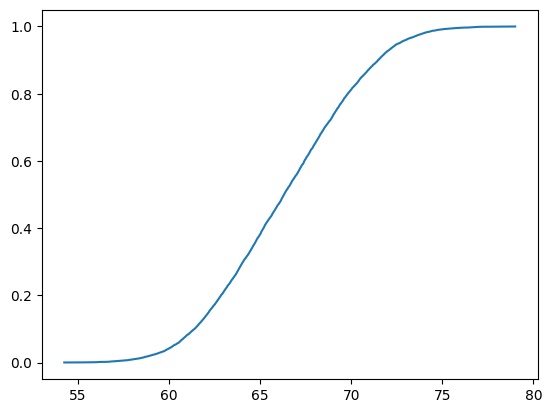

In [ ]:
x_values = np.linspace(min_height, max_height, 1000)
y_values = []

for x in x_values:
    people_shorter_than_x = df_height[df_height <= x]

    num_people_shorter_than_x = len(people_shorter_than_x)

    frac_people_shorter_than_x = num_people_shorter_than_x / total

    y_values.append(frac_people_shorter_than_x)



plt.plot(x_values, y_values)

In [ ]:
e = ECDF(df_height)

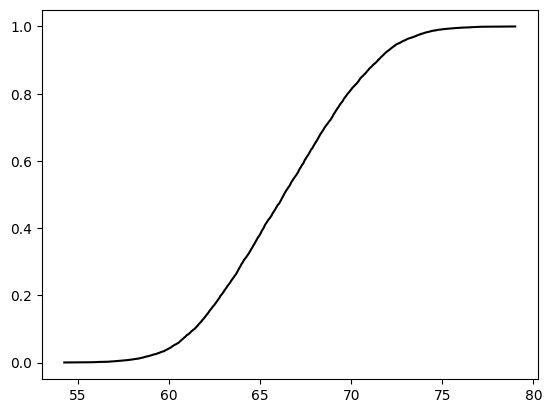

In [ ]:
plt.plot(e.x, e.y, c = "k")

In [ ]:
df_height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

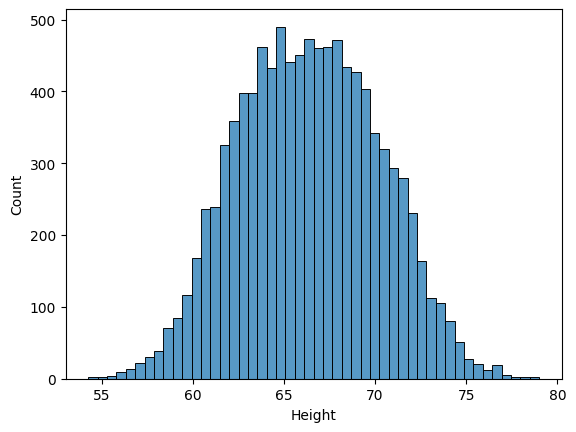

In [ ]:
sns.histplot(df_height)

In [ ]:
from scipy.stats import norm
norm.cdf(1)
# pre defined library/ syntax for z- table

0.8413447460685429

In [ ]:
norm.ppf(0.689)

0.49301781448446474

In [ ]:
z= norm.ppf(0.9)
(z* 13.1)+119

135.78832550863427

In [ ]:
norm.cdf(1.5)

0.9331927987311419

In [ ]:
norm.ppf(0.01)

-2.3263478740408408

In [ ]:
1

1

In [ ]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df_hw_height= df_hw["Height"]
df_hw_height.mean()

66.36755975482124

In [ ]:
mu= round(df_hw_height.mean(),5)
sig= round(df_hw_height.std(),5)
print(mu, sig)

66.36756 3.84753


In [ ]:
# Analysis for 5 sample size
sample_5= df_hw_height.sample(5)
sample_5

4171    71.484075
700     69.760095
159     65.218576
9693    64.223776
551     60.679817
Name: Height, dtype: float64

In [ ]:
sample_5.mean()

66.2732675856868

In [ ]:
np.mean(sample_5)
# close to 66.36756

66.2732675856868

<Axes: ylabel='Count'>

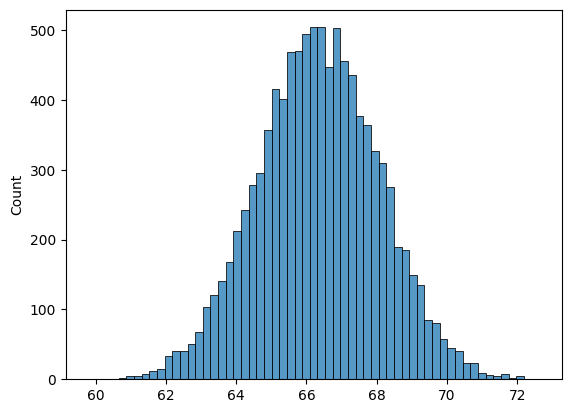

In [ ]:
matrix_sample_5= [np.mean(df_hw_height.sample(5)) for i in range(10000)]
len(matrix_sample_5)
sns.histplot(matrix_sample_5)

In [ ]:
print(np.mean(matrix_sample_5), np.std(matrix_sample_5))

66.33937797762293 1.7277556213312655


In [ ]:
sigma= df_hw_height.std()
sigma

3.8475281207732293

In [ ]:
sigma/np.sqrt(5)

1.7206668846781923

<Axes: ylabel='Count'>

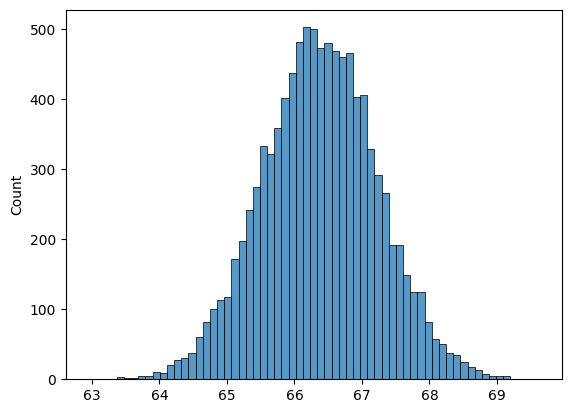

In [ ]:
matrix_sample_20= [np.mean(df_hw_height.sample(20)) for i in range(10000)]
len(matrix_sample_20)
sns.histplot(matrix_sample_20)

In [ ]:
print(np.mean(matrix_sample_20), np.std(matrix_sample_20))

66.37411622531218 0.8543637724821576


In [ ]:
sigma/np.sqrt(20)
# Standard deviation getting smaller as we increase sample space size.
# Mean value is getting more closer to the exact value.

0.8603334423390961

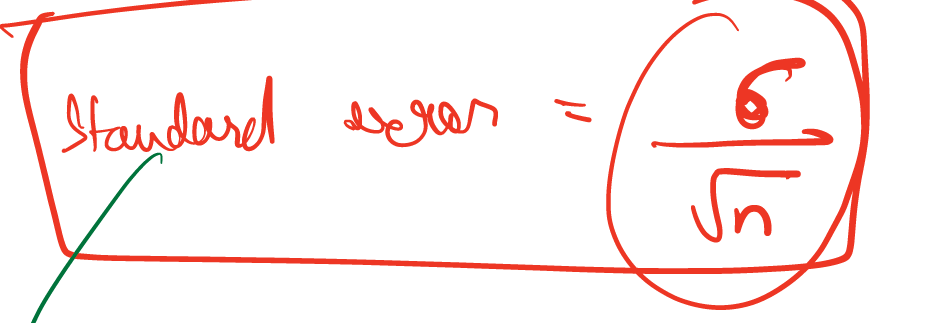

In [ ]:
1- norm.cdf(1.2)

0.11506967022170822

In [ ]:
1-norm.cdf(1.1)

0.13566606094638267

In [ ]:
def calculate_prob(mu , sigma, n, required):
  std_err = sigma/np.sqrt(n)
  z = (required - mu)/std_err
  prob_less = norm.cdf(z)
  prob_greater = 1 - norm.cdf(z)
  return prob_less, prob_greater

In [ ]:
'''
In an e-commerce website, the average purchase amount per customer is $80 with a
standard deviation of $15. If we randomly select a sample of 50 customers,
what is the probability that the average purchase amount in the sample will be
less than $75?
'''
calculate_prob(80, 15, 50, 75)

(0.009211062727049501, 0.9907889372729505)

In [ ]:
'''
def list(mu,sigma,sample,R1,R2):
  sigma_e= sigma/np.sqrt(sample)
  p1= norm.cdf((R1 - mu)/sigma_e)
  p2= norm.cdf((R2 - mu)/sigma_e)
  result= p1-p2
  return result
  '''

'\ndef list(mu,sigma,sample,R1,R2):\n  sigma_e= sigma/np.sqrt(sample)\n  p1= norm.cdf((R1 - mu)/sigma_e)\n  p2= norm.cdf((R2 - mu)/sigma_e)\n  result= p1-p2\n  return result\n  '

In [ ]:
#list(90,15,35,92,85)

In [ ]:
def life(mu,sigma,sample,L):
  sigma_e= sigma/np.sqrt(sample)
  p1= norm.cdf((L - mu)/sigma_e)
  return p1
life(5,0.5,5,5.5)

0.9873263406612659

In [ ]:
def intake(mu,sigma,sample,C):
  sigma_e= sigma/np.sqrt(sample)
  p1= norm.cdf((C - mu)/sigma_e)
  return p1
life(1000,188,20,947.4)

0.10542226996329152

In [ ]:
s= 5/np.sqrt(3)
1- norm.cdf((60-50)/s)

0.00026600275256960515

In [ ]:
# 95% Confidence Interval of the true mean
std_error= 2/np.sqrt(100)
x1= norm.ppf(0.025)*std_error + 10.5
x2= norm.ppf(0.975)*std_error + 10.5
print(x1,x2)

10.108007203091988 10.89199279690801


###Confidence Interval Using Bootstrap

In [ ]:
bucket1= [7,11,12,10,15,10.5]
np.mean(bucket1).round(3)

10.917

In [ ]:
# Now here we have to generate more samples from given bucket
# It randomly select element from sample
np.random.choice(bucket1)

10.5

In [ ]:
np.random.choice(bucket1, size= 6)

array([15.,  7., 10., 10.,  7.,  7.])

In [ ]:
np.random.choice(bucket1, size= 6)

array([15. , 10. , 15. ,  7. , 11. , 10.5])

In [ ]:
# Now to take this sample and create dumy/ hacked list with sample's components.
# Here bootstrap will help
bootstrapped_mean_bucket= []
for reps in range(10000):
  bootstrapped_sample = np.random.choice(bucket1, size= 6)
  bootstrapped_mean= np.mean(bootstrapped_sample) # other statistical functions can also be used
  bootstrapped_mean_bucket.append(bootstrapped_mean)

<Axes: ylabel='Count'>

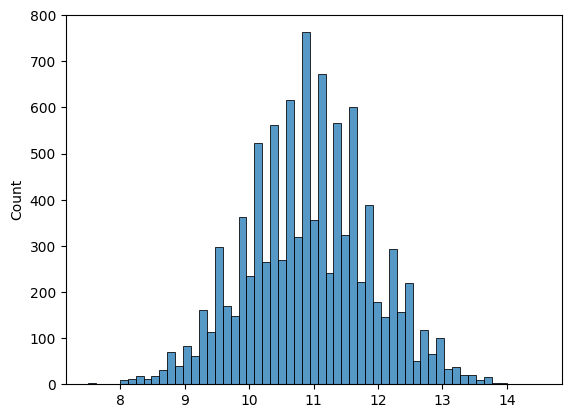

In [ ]:
sns.histplot(bootstrapped_mean_bucket)

In [ ]:
np.std(bootstrapped_mean_bucket)

0.9735261287368373

13.4
[ 5.  5. 14. 14.  9. 14.]


<Axes: ylabel='Count'>

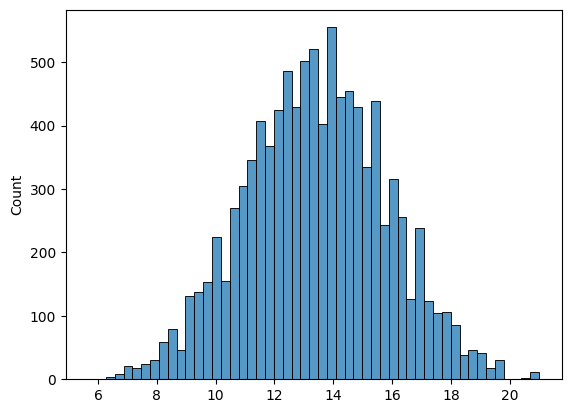

In [ ]:
bucket2= [5,14,11,9,21,20.4]
print(np.mean(bucket2).round(3))

print(np.random.choice(bucket2, size= 6))

bootstrapped_mean_bucket2= []
for reps in range(10000):
  bootstrapped_sample2 = np.random.choice(bucket2, size= 6)
  bootstrapped_mean2= np.mean(bootstrapped_sample2) # other statistical functions can also be used
  # such as median, mode, sum, etc.
  bootstrapped_mean_bucket2.append(bootstrapped_mean2)

sns.histplot(bootstrapped_mean_bucket2)

In [ ]:
np.std(bootstrapped_mean_bucket2)
# Wide range of sample/ more variance which can be decresed by obtainig 90% variance or lower.

2.3799930748638745

In [ ]:
'''
As per Central Limit Theorem
Original distribution need not be in Gaussian distribution however the mean of sample of population
will be in Gausian.
'''

'\nAs per Central Limit Theorem\nOriginal distribution need not be in Gaussian distribution however the mean of sample of population\nwill be in Gausian.\n'

In [ ]:
# Here bootstrap is the LIST which follows Normal distribution.
# For 95% CI value
x1=np.percentile(bootstrapped_mean_bucket, 2.5).round(3)
x2=np.percentile(bootstrapped_mean_bucket, 97.5).round(3)
print(x1,x2)

9.0 12.833


In [ ]:
# For 95% CI value
y1=np.percentile(bootstrapped_mean_bucket2, 2.5).round(3)
y2=np.percentile(bootstrapped_mean_bucket2, 97.5).round(3)
print(y1,y2)
# Wider range

8.833 18.067


In [ ]:
# For 80% CI value
z1=np.percentile(bootstrapped_mean_bucket2, 10).round(3)
z2=np.percentile(bootstrapped_mean_bucket2, 90).round(3)
print(z1,z2)
# Better range but we have to decrease the percentile

10.333 16.467


In [ ]:
def p_less(mu, sigma, n, req):
  sigma_er= sigma/np.sqrt(n)
  res= norm.cdf((req - mu)/sigma_er)
  return res
p_less(900, 50, 20, 875)

0.012673659338734126

In [ ]:
def btw(mu, sigma, n, r1, r2):
  sigma_er= sigma/np.sqrt(n)
  x1= norm.cdf((r1 - mu)/sigma_er)
  x2= norm.cdf((r2 - mu)/sigma_er)
  print(x2-x1)

btw(28,7,50,26,31)

0.9771032071594303


In [ ]:
# 95% Confidence Interval of the true mean
std_error= 8/np.sqrt(100)
x1= norm.ppf(0.025)*std_error + 24
x2= norm.ppf(0.975)*std_error + 24
print(x1,x2)

22.432028812367957 25.567971187632043


In [ ]:
# 90% Confidence Interval of the true mean
std_error= 10/np.sqrt(100)
x1= norm.ppf(0.05)*std_error + 75
x2= norm.ppf(0.95)*std_error + 75
print(x1,x2)

73.35514637304853 76.64485362695147


In [ ]:
# 90% Confidence Interval of the true mean
std_error= 10
x1= norm.ppf(0.05)*std_error + 75
x2= norm.ppf(0.95)*std_error + 75
print(x1,x2)

58.55146373048527 91.44853626951472


In [ ]:
# 90% Confidence Interval of the true mean
std_error= 8/np.sqrt(100)
x1= norm.ppf(0.05)*std_error + 165
x2= norm.ppf(0.95)*std_error + 165
print(x1,x2)

163.68411709843883 166.31588290156117


In [ ]:
1/(19*17*13*22)

1.082508822446903e-05

###BINOMIAL- GEOMETRIC

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import binom, geom, norm

In [ ]:
'''
Binomial means --> each trial has a fixed prob of success and we are counting the number of success
Bernouli--> its a special case of BInomial with n=1 (only 1 trial)
'''

'\nBinomial means --> each trial has a fixed prob of success and we are counting the number of success\nBernouli--> its a special case of BInomial with n=1 (only 1 trial)\n'

<Axes: >

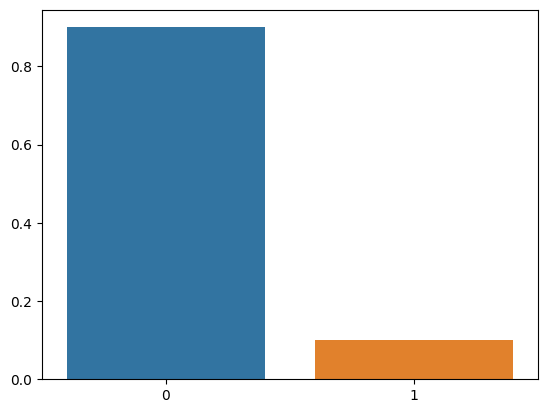

In [ ]:
# if probability of sucess is 0.1
p= 0.1
x_val= [0, 1]
probs= [1-p, p]
sns.barplot(x= x_val, y= probs)

In [ ]:
#For one trial, this probability mass function represents "Bernouli Distribution"
#Bernouli is a special case of Binomial with n = 1

Question: Suppose you are giving two interviews. Let X denote number of offer letters you can get. What are all the possible values that X can take?

Answer: {0, 1, 2}

<Axes: >

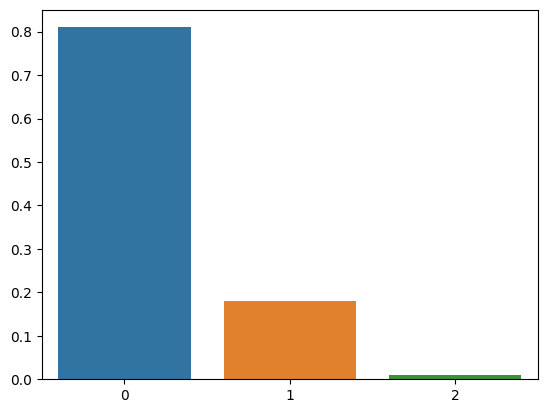

In [ ]:
n = 2
p = 0.1
x_vals = [0, 1, 2]
probs = [
        (1-p)*(1-p), #prob of x = 0
        p*(1-p) + (1-p)*p, #prob of x = 1
        p*p #prob x = 2
]
probs
sns.barplot(x = x_vals, y = probs)

<Axes: >

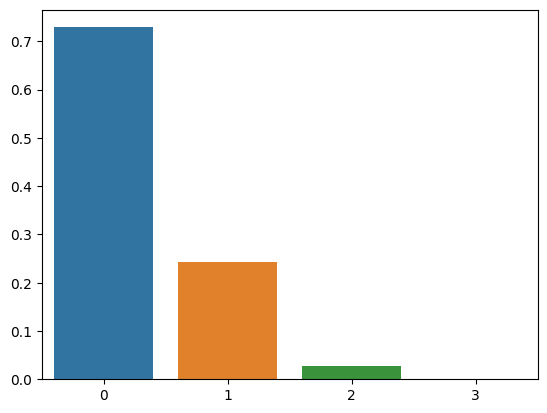

In [ ]:
n = 3
p = 0.1
x_vals = [0, 1, 2, 3]
probs = [
        (1-p)*(1-p)*(1-p), #prob for x = 0
        (1-p)*(1-p)*p + (1-p)*p*(1-p) + p*(1-p)*(1-p), #prob of x = 1
        (1-p)*p*p + p*(1-p)*p + p*p*(1-p), #prob x = 2
        p*p*p #prob for x = 4
]
probs
sns.barplot(x = x_vals, y = probs)

<Axes: >

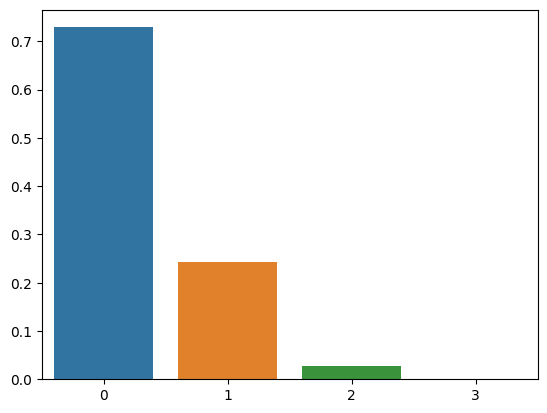

In [ ]:
# Thus can be obtained by
probs_binom= binom.pmf(x_vals, n=3, p=0.1)
sns.barplot(x= x_vals, y= probs_binom)

In [ ]:
# specific element of list can be obtained by
a = binom.pmf(0, n= 3, p = 0.1)
print(a)

0.7290000000000001


In [ ]:
b= binom.pmf([0,1], n= 4, p= 0.3)
print(b)

[0.2401 0.4116]


<Axes: >

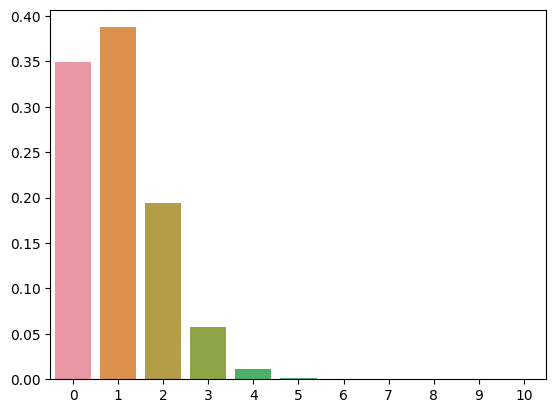

In [ ]:
n = 10
p = 0.1
x_vals = np.arange(0,n+1)
probs_binom = binom.pmf(x_vals, n = n, p = p)
sns.barplot(x = x_vals, y = probs_binom)
#HW - try to change n and p and observe the pattern

<Axes: >

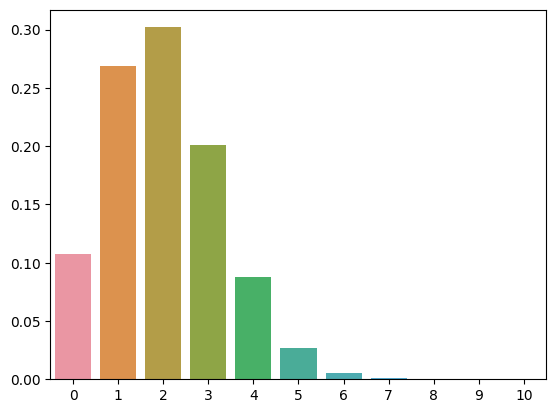

In [ ]:
n = 10
p = 0.2
x_vals = np.arange(0,n+1)
probs_binom = binom.pmf(x_vals, n = n, p = p)
sns.barplot(x = x_vals, y = probs_binom)

<Axes: >

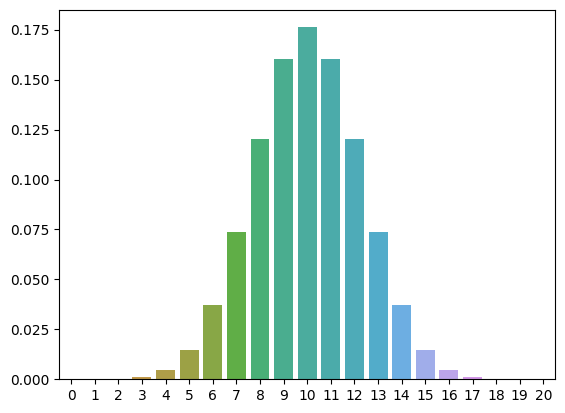

In [ ]:
n = 20
p = 0.5
x_vals = np.arange(0,n+1)
probs_binom = binom.pmf(x_vals, n = n, p = p)
sns.barplot(x = x_vals, y = probs_binom)

1. Geometric distribution
2. here we are interested in no.of interviews as number of offer letter is fixed to 1 - first success
3. no of interviews till first success

<Axes: >

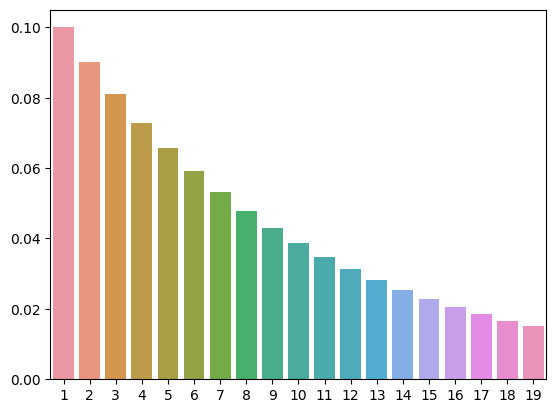

In [ ]:
p=0.1
x_vals = np.arange(1, 20)
probs_geom = geom.pmf(x_vals, p=p)
sns.barplot(x=x_vals, y = probs_geom)

In [ ]:
'''
Messi and penalty: Success rate is 80%, He kicks 10 times. What is the probability of having 7 or less successes?
'''

'\nMessi and penalty: Success rate is 80%, He kicks 10 times. What is the probability of having 7 or less successes?\n'

In [ ]:
n = 10
p = 0.8
binom.cdf(k=7, n=n, p=p)

0.32220047359999987

In [ ]:
np.sum([binom.pmf(k=i, n=n, p=p) for i in np.arange(0, 8)])
#adding all the pmf from 0 to 7 (k)
#cdf is sum of individual pmfs (usually when <= asked --> cumulative)
# less then vaala use bhi kiya ja sakta hai (1-x).

0.3222004735999996

(array([0.01024, 0.0768 , 0.2304 , 0.3456 , 0.2592 , 0.07776]),
 0.3455999999999997)

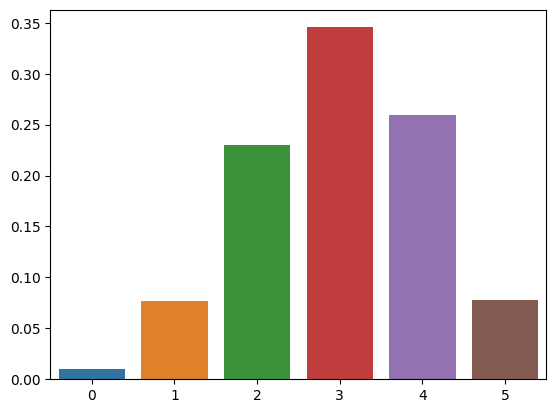

In [ ]:
# Q-01
def binomial(n, p, m):
  x_valu= np.arange(n+1)
  basket= binom.pmf(x_valu, n= n, p= p)
  result= binom.pmf(m,n= n, p= p)
  sns.barplot(x=x_valu, y=basket)
  return (basket, result)
binomial(5,0.6, 3)
# m is count of outcome as per requirement

In [ ]:
basket3= binom.pmf(3, n= n, p= p)
basket3

0.0007864319999999988

(array([1.00565852e-05, 1.34087802e-04, 8.71570714e-04, 3.67996524e-03,
        1.13465595e-02, 2.72317428e-02, 5.29506109e-02, 8.57295605e-02,
        1.17878146e-01, 1.39707432e-01, 1.44364346e-01, 1.31240315e-01,
        1.05721365e-01, 7.59025183e-02, 4.87944760e-02, 2.81923639e-02,
        1.46835229e-02, 6.90989312e-03, 2.94310263e-03, 1.13593435e-03,
        3.97577021e-04, 1.26214927e-04, 3.63346003e-05, 9.47859139e-06,
        2.23800074e-06, 4.77440159e-07, 9.18154151e-08, 1.58693310e-08,
        2.45596789e-09, 3.38754192e-10, 4.14032902e-11, 4.45196669e-12,
        4.17371877e-13, 3.37270204e-14, 2.31459944e-15, 1.32262825e-16,
        6.12327893e-18, 2.20658700e-19, 5.80680790e-21, 9.92616735e-23,
        8.27180613e-25]),
 0.14436434635625664)

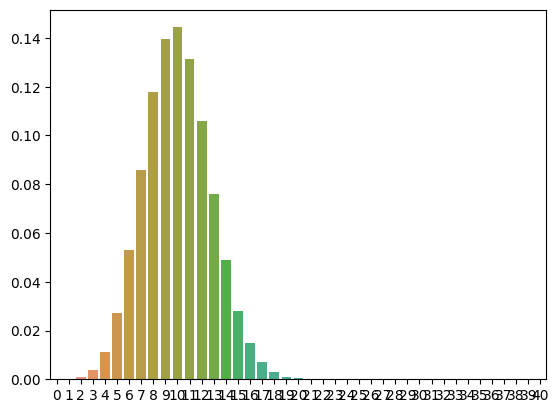

In [ ]:
binomial(40, 0.25, 10)

In [ ]:
n= 10
p= 0.12
binom.cdf(k=3, n=n, p=p)
# sum of upto k

0.9760611779412912

In [ ]:
n= 10
p= 0.25
k=2
math.comb(n,k)*(p**k)*((1-p)**(n-k))

0.2815675735473633

In [ ]:
#also
binom.pmf(p=0.25, n=10, k=2)

0.28156757354736334

In [ ]:
binom.cdf(p=0.8, n=10, k=7)

0.32220047359999987

In [ ]:
binom.cdf(p=0.6, n=6, k=4)

0.7667200000000001

In [ ]:
binom.pmf(p=0.0002, n= 15000, k=0)

0.049772132496380066

In [ ]:
binom.pmf(n=4, p=0.25, k=1)

0.4218750000000001

In [ ]:
math.factorial(10)*math.factorial(10)*2/math.factorial(20)

1.082508822446903e-05

In [ ]:
'''
expected number of trials required for outcome is equalt to 1/p.
In permutations- arrangment of elements where order matters means 'a' to
1st loaction and 'b' to 2nd is not same sa 'a' to 2nd and 'b' to 1st location.

In combinations- arrangment of elements where order not matters means 'a' to
1st loaction and 'b' to 2nd is same sa 'a' to 2nd and 'b' to 1st location.
'''

In [ ]:
1- norm.cdf((65-60)/10)

0.3085375387259869

In [ ]:
1- (1/(6**4))

0.9992283950617284

In [ ]:
print(3/89,11/89,12/89,26/89,37/89)

0.033707865168539325 0.12359550561797752 0.1348314606741573 0.29213483146067415 0.4157303370786517


In [ ]:
(0.7**3)*(0.3**2)

0.03086999999999999

In [ ]:
(0.8**6)*(0.2**4)*210

0.08808038400000005

In [ ]:
79.2/3

26.400000000000002

In [ ]:
z1= (13-27)/7
R1= norm.cdf(z1)
z2= (20-27)/7
R2= norm.cdf(z2)
print(R2-R1)
r= (R2-R1)*10000
print(r)

0.13590512198327787
1359.0512198327788


In [ ]:
z3= (13-27)/(7/np.sqrt(10000))
R3= norm.cdf(z3)
z4= (20-27)/(7/np.sqrt(10000))
R4= norm.cdf(z4)
print(R4-R3)
s= (R4-R3)*10000
print(s)

0.0
0.0


In [ ]:
z=norm.ppf(0.99)
z*(100/np.sqrt(5))+1800

1904.0374397133487

In [ ]:
2/np.sqrt(5)
norm.cdf(-0.8944)

0.18555395623998766

In [ ]:
z= 5/(8.5/np.sqrt(10))
1-norm.cdf(z)

0.031431210741779014

In [ ]:
z= 30/(125/np.sqrt(70))
1-norm.cdf(z)
z

2.007984063681781

In [ ]:
z= 0.15/(0.5/np.sqrt(30))
print(1-norm.cdf(z))
print(z)

0.05017412323114534
1.6431676725154984


In [ ]:
3.5+(1.28*0.7/np.sqrt(45))

3.6335677938559874

T-TEST

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import binom, geom, norm
from scipy.stats import ttest_1samp, ttest_ind

In [ ]:
# Pastries shop question
'''
H0 = 500
Ha = 530
Zc = 1.64
'''
z= (530-500)*np.sqrt(70)/125
p_val= 1- norm.cdf(z)

if p_val < 0.05:
  print("Reject H0\nproduction of pastries will be more the 500")
else:
  print("Does not reject H0\n500 hi hai")

Reject H0
production of pastries will be more the 500


In [ ]:
from scipy.stats import ttest_1samp, ttest_ind

In [ ]:
# single sample test (T-TEST)
constant= 100
alpha= 0.01
sample_1= [110,105,98,102,99,104,115,95]
np.mean(sample_1)

103.5

In [ ]:
t_stat, p_value= ttest_1samp(sample_1, constant)
print(p_value)
print(t_stat)

0.1754994493585011
1.5071573172061195


In [ ]:
# 2-Sample test(ttest_ind)
df_school= pd.read_csv("iq_two_schools.csv")

In [ ]:
df_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   School  50 non-null     object
 1   iq      50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


In [ ]:
df_school.head()

,School,iq
0,school_1,91
1,school_1,95
2,school_1,110
3,school_1,112
4,school_1,115


In [ ]:
df_school.groupby("School").mean("iq")
# Here it give output as table

,iq
School,
school_1,101.153846
school_2,109.416667


In [ ]:
df_school.groupby("School")["iq"].mean()

School
school_1    101.153846
school_2    109.416667
Name: iq, dtype: float64

In [ ]:
df_school.groupby("School").count()
# number of entries uner school_1 and school_2

,iq
School,
school_1,26
school_2,24


In [ ]:
school_1= df_school[df_school["School"]=="school_1"]["iq"]
school_2= df_school[df_school["School"]=="school_2"]["iq"]
# making two different sets of

In [ ]:
school_1

0      91
1      95
2     110
3     112
4     115
5      94
6      82
7      84
8      85
9      89
10     91
11     91
12     92
13     94
14     99
15     99
16    105
17    109
18    109
19    109
20    110
21    112
22    112
23    113
24    114
25    114
Name: iq, dtype: int64

In [ ]:
# H0= school_1 and school_2 has same mean value of iq
# Ha= school_1 and school_2 has a different mean value  of iq (school_1 != school_2)

t_stat, p_value= ttest_ind(school_1, school_2)

a= 0.05

if p_value<a:
  print("H0 rejected\nschool_1 and school_2 has different mean")
else:
  print("Failto reject H0")

H0 rejected
school_1 and school_2 has different mean


In [ ]:
# H0= school_1 and school_2 has same mean value of iq
# Ha= school_1's mean is less then school_2's (school_1 < school_2)

t_stat, p_value= ttest_ind(school_1, school_2, alternative= "less")

a= 0.05
print(p_value)
if p_value < a:
  print("H0 rejected")
else:
  print("Fail to reject H0")

0.010022763554681085
H0 rejected


In [ ]:
# H0= school_1 and school_2 has same mean value of iq
# Ha= school_1's mean is greater then school_2's (school_1 > school_2)

t_stat, p_value= ttest_ind(school_1, school_2, alternative= "greater")

a= 0.05
print(p_value)
if p_value < a:
  print("H0 rejected")
else:
  print("Fail to reject H0")

0.9899772364453189
Fail to reject H0


SACHIN INNINGS

In [ ]:
god_inn= pd.read_csv("Sachin_ODI.csv")

In [ ]:
god_inn.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


In [ ]:
god_inn["runs"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 360 entries, 0 to 359
Series name: runs
Non-Null Count  Dtype
--------------  -----
360 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [ ]:
god_inn["runs"].sum()

15567

In [ ]:
god_inn["NotOut"].value_counts()

0    330
1     30
Name: NotOut, dtype: int64

In [ ]:
god_inn["fours"].sum()

1749

In [ ]:
god_inn["sixes"].sum()

168

In [ ]:
god_inn["Opp"].value_counts()

Sri Lanka       63
Australia       61
Pakistan        59
South Africa    44
New Zealand     32
Zimbabwe        28
England         25
West Indies     22
Bangladesh      10
Kenya            9
Netherlands      2
Ireland          2
Namibia          1
U.A.E.           1
Bermuda          1
Name: Opp, dtype: int64

In [ ]:
god_inn.groupby("Opp")["runs"].sum()

Opp
Australia       2732
Bangladesh       460
Bermuda           57
England         1168
Ireland           42
Kenya            647
Namibia          152
Netherlands       79
New Zealand     1253
Pakistan        2254
South Africa    1758
Sri Lanka       2757
U.A.E.            18
West Indies      968
Zimbabwe        1222
Name: runs, dtype: int64

In [ ]:
god_inn.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


In [ ]:
# comparision of mean "runs" scored by Sachin in 1st Inn and 2nd Inn
god_inn_1= god_inn[god_inn["Inns"] == 1]["runs"]
god_inn_2= god_inn[god_inn["Inns"] == 2]["runs"]

In [ ]:
god_inn.groupby("Inns")["runs"].mean() #We have to justify this by using p_values

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [ ]:
'''
H0= mu(god_inn_1)=mu(god_inn_2)
Ha= mu(god_inn_1)>mu(god_inn_2)
'''
t_stat, p_value= ttest_ind(god_inn_1, god_inn_2, alternative= "greater")

print(p_value)

if p_value < 0.05:
  print("reject H0")
else:
  print("Fail to reject H0")

0.07241862097379981
Fail to reject H0


In [ ]:
# comparision for the run scored against Australia and Srilanka
god_inn_A= god_inn[god_inn["Opp"] == "Australia"]["runs"]
god_inn_S= god_inn[god_inn["Opp"] == "Sri Lanka"]["runs"]

In [ ]:
m1= god_inn_A.mean()
m2= god_inn_S.mean()
print(m1, m2)

44.78688524590164 43.76190476190476


In [ ]:
'''
H0= m1 = m2
Ha= m1 > m2 (Australia ke against jyaada avg w.r.t. Sri Lanka)
'''
t_stat, p_value= ttest_ind(god_inn_A, god_inn_S, alternative= "greater")

print(p_value)

if p_value < 0.05:
  print("Reject H0\nAustraliya ke against jyaada hai avg wrt Srilanka")
else:
  print("Fail to reject H0\nsame avg against A and S")

0.4460889666457219
Fail to reject H0
same avg against A and S


In [ ]:
# comparision for the run scored against Pakistan and Kenya.
god_inn_P= god_inn[god_inn["Opp"] == "Pakistan"]["runs"]
god_inn_K= god_inn[god_inn["Opp"] == "Kenya"]["runs"]

In [ ]:
m3= god_inn_P.mean()
m4= god_inn_K.mean()
print(m3, m4)

38.20338983050848 71.88888888888889


In [ ]:
'''
H0= m3 = m4
Ha= m3 < m4 (Pak ke against jyaada avg w.r.t. Kenya)
'''
t_stat, p_value= ttest_ind(god_inn_P, god_inn_K, alternative= "less")

print(p_value)
if p_value < 0.05:
  print("Reject H0\nKenya ke against jyaada hai avg wrt Pak")
else:
  print("Fail to reject H0\nsame avg against Kenya and Pak")

0.01536256702363041
Reject H0
Kenya ke against jyaada hai avg wrt Pak


If in case of single enty like UAE/Namibia/ Bermuda
p_values not found!

In [ ]:
# Day 86/ T-Test/ Q-1
sample= [14.3,12.6,13.7,10.9,13.7,12.0,11.4,12.0,12.6,13.1]

t_stat, p_value = ttest_1samp(sample, 12.0, alternative= "greater")

print(p_value)

0.04979938002326665


In [ ]:
np.mean(sample)

12.629999999999999

In [ ]:
# Day 86/ T-Test/ Q-2
# H0= sample and population means are same
# Ha= different means
height= [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]

t_stat, p_value = ttest_1samp(height, 175.3)

print(p_value)

if p_value < 0.05:
  print("Reject H0\ndifferent mean")
else:
  print("Fail to reject\nsame mean")

0.04734137339747034
Reject H0
different mean


In [ ]:
np.mean(height)

177.96

In [ ]:
# Day 86/ T-Test/ Q-3
# H0= standard and potato yield mu are same
# Ha= greater mean
farm= [21.5, 24.5, 18.5, 17.2, 14.5, 23.2, 22.1, 20.5, 19.4, 18.1, 24.1, 18.5]

t_stat, p_value = ttest_1samp(farm, 20, alternative= "greater")

print(p_value)
mu_a= np.mean(farm)
print(mu_a)

if p_value < 0.05:
  print("Reject H0\ndifferent mean")
else:
  print("Fail to reject\nsame mean")

0.4223145946526807
20.175
Fail to reject
same mean


In [ ]:
# Day 86/ T-Test/ Q-4
# H0= body fat % is same for M and F
# Ha= body fat % is different for M and F
men= [13.3, 6.0, 20.0, 8.0, 14.0, 19.0, 18.0, 25.0, 16.0, 24.0, 15.0, 1.0, 15.0]
women= [22.0, 16.0, 21.7, 21.0, 30.0, 26.0, 12.0, 23.2, 28.0, 23.0]

t_stat, p_value = ttest_ind(men, women)

print(p_value)
mu_m= np.mean(men)
mu_w= np.mean(women)
print(mu_m, mu_w)

if p_value < 0.05:
  print("Reject H0\ndifferent mean of M and F")
else:
  print("Fail to reject\nsame mean of M and F")

0.010730607904197957
14.946153846153846 22.29
Reject H0
different mean of M and F


In [ ]:
# Day 86/ T-Test/ Q-5
# H0= IQs of school_1 is same as school_2
# Ha= Different IQs
school_1= [115, 111, 112, 101, 95, 98, 100, 90, 89, 108]
school_2= [107, 103, 91, 99, 104, 98, 117, 113, 92, 96, 108, 115, 116, 88]

t_stat, p_value = ttest_ind(school_1, school_2)

print(p_value)
mu_1= np.mean(school_1)
mu_2= np.mean(school_2)
print(mu_m, mu_w)

if p_value < 0.05:
  print("Reject H0\ndifferent IQ mean of 1 and 2")
else:
  print("Fail to reject\nsame IQ mean of 1 and 2")

0.7154458095186707
14.946153846153846 22.29
Fail to reject
same IQ mean of 1 and 2


##Chisquared Test

In [ ]:
from scipy.stats import chisquare
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

In [ ]:
# H0: coin is fair
# Ha: coin is baised
'''with 95% confidence or 5% significance'''

chi_stat, p_value = chisquare(
    [28,22], # observed value
    [25,25] # expected value
)
print(chi_stat)

0.72


In [ ]:
print(p_value)

0.3961439091520741


In [ ]:
chi_stat= ((28-25)**2)/25 + ((22-25)**2)/25
print(chi_stat)

0.72


In [ ]:
# To find p_value
1 - chi2.cdf(chi_stat, df=1) # df: it stands for the degree of freedom

0.3961439091520741

In [ ]:
# for revrese, such as here for critical point
chi2.ppf(0.95, df=1)

3.841458820694124

Online/ Offline customer

In [ ]:
'''
Testing independence with chi2_contingency
H0: Gender has no effect on preference
Ha: Gender marks its presence on preference
'''
Observed= [
    [527,72],
    [206,102]
]
alpha= 0.05
chi_stat, p_value, df, exp_freq= chi2_contingency(Observed)

In [ ]:
print(chi_stat)
print(p_value) # very much low value
print(df) # DOF
print(exp_freq) # expected values/ It is equivalent, %= online/total...
# ...then apply on Men and Women, %=online/Men and %=online/Women

if p_value < alpha:
  print("Reject H0")
  print("Gender has impact on Preference")
else:
  print("Fail to reject")
  print("Gender has no impact on preference")

57.04098674049609
4.268230756875865e-14
1
[[484.08710033 114.91289967]
 [248.91289967  59.08710033]]
Reject H0
Gender has impact on Preference


Assumptions considered in chi2:

'''
Both the variables are categorical

Observations are independent

Each cell is mutually exclusive

Expected value in each cell is greater than 5
'''

In [ ]:
# Whenever comparision is in between two categorical variables --> use chisquare test

Assignment Day-88

In [ ]:
# Q-1
# H0: marital status has no effect on alco consumption
# Ha: marital status and alco consumption are related
Observed= [
    [67,213,74],
    [411,633,129],
    [85,51,7],
    [27,60,15]
]
alpha= 0.05
chi_stat, p_value, df, exp_freq= chi2_contingency(Observed)

In [ ]:
print(chi_stat)
print(p_value)
print(df) # Degree of freedom
print(exp_freq) # these outputs would be expected by considering H0

if p_value < alpha:
  print("Reject H0\nmarital status and alco consumption are related")
else:
  print("Fail to reject\nmarital status has no effect on alco consumption")

94.26880078578765
3.925170647869838e-18
6
[[117.86681716 191.18397291  44.94920993]
 [390.55869074 633.49943567 148.94187359]
 [ 47.61286682  77.22968397  18.15744921]
 [ 33.96162528  55.08690745  12.95146727]]
Reject H0
marital status and alco consumption are related


In [ ]:
# Q-2
# H0: No relation between education level and diabetic state
# Ha: association between education level and diabetic state
Observed2= [
    [33,218],
    [25,389],
    [20,393],
    [17,178]
]
alpha= 0.01
chi_stat, p_value, df, exp_freq= chi2_contingency(Observed2)

print(chi_stat)
print(p_value)
print(df) # Degree of freedom
print(exp_freq) # these outputs would be expected by considering H0

if p_value < alpha:
  print("Reject H0\nassociation between education level and diabetic state")
else:
  print("Fail to reject H0\nNo relation between education level and diabetic state")

17.51186847271713
0.000554511571355531
3
[[ 18.73134328 232.26865672]
 [ 30.89552239 383.10447761]
 [ 30.82089552 382.17910448]
 [ 14.55223881 180.44776119]]
Reject H0
association between education level and diabetic state


In [ ]:
'''
exp_freq= 18.73 for diebetes person with Less than HS educationwhich is 7.4%
of Total Less than HS person(251).
This 7.4% is came from Diebatic person's share among total(95/1273).
Observation= kam padhe hue hone ki vajah se 18 logon ko agar diebates hai to hum kah sakte hain ki H0 sahi hai
but here 33 logon ka figure hai.
vahin padhe hue  logon me diebates 30 logon ko hona chaahiye but actually it is 20, that gives intution of
having some effect of education over the diebaties.
'''

"\nexp_freq= 18.73 for diebetes person with Less than HS educationwhich is 7.4%\nof Total Less than HS person(251).\nThis 7.4% is came from Diebatic person's share among total(95/1273).\nObservation= kam padhe hue hone ki vajah se 18 logon ko agar diebates hai to hum kah sakte hain ki H0 sahi hai\nbut here 33 logon ka figure hai.\nvahin padhe hue  logon me diebates 30 logon ko hona chaahiye but actually it is 20, that gives intution of\nhaving some effect of education over the diebaties.\n"

In [ ]:
# Q-3
# H0: No relation between Religiosity and education
# Ha: Association between Religiosity and education

Observed3= [
    [77,149,78],
    [23,56,36],
    [8,24,29],
    [6,15,8]
]
alpha= 0.05

chi_stat, p_value, df, exp_freq= chi2_contingency(Observed3)

print(chi_stat)
print(p_value)
print(df)
print(exp_freq)

if p_value < alpha:
  print("Reject H0\nAssociation between Religiosity and education")
else:
  print("Fail to reject H0\nNo relation between Religiosity and education")

13.322313008960627
0.038193742691133806
6
[[ 68.08644401 145.72888016  90.18467583]
 [ 25.75638507  55.12770138  34.11591356]
 [ 13.66208251  29.24165029  18.09626719]
 [  6.49508841  13.90176817   8.60314342]]
Reject H0
Association between Religiosity and education


In [ ]:
# Q-4
# H0: No background check required for Gun control
# Ha: Background check required for Gun control
Observed4= [
    [335,348,318],
    [35,23,50]
]
alpha= 0.01
chi_stat, p_value, df, exp_freq= chi2_contingency(Observed4)

print(chi_stat)
print(p_value)
print(df) # Degree of freedom
print(exp_freq) # these outputs would be expected by considering H0

if p_value < alpha:
  print("Reject H0\nBackground check required for Gun control")
else:
  print("Fail to reject H0\nNo background check required for Gun control")

11.519544916042339
0.003151828690194211
2
[[333.96753832 334.87015329 332.16230839]
 [ 36.03246168  36.12984671  35.83769161]]
Reject H0
Background check required for Gun control


In [ ]:
# Q-5
# H0: No relation between Age and Internet use
# Ha: Associate between Age and Internet use

Observation5= [
    [6,38,31],
    [14,31,4],
    [50,50,5]
]
alpha= 0.01
chi_stat, p_value, df, exp_freq= chi2_contingency(Observation5)

print(chi_stat)
print(p_value)
print(df) # Degree of freedom
print(exp_freq) # these outputs would be expected by considering H0

if p_value < alpha:
  print("Reject H0\nAssociate b/w age and internet")
else:
  print("Fail to reject H0\nNo relation b/w Age and Internet")

60.74604310295546
2.0217185191724964e-12
4
[[22.92576419 38.97379913 13.10043668]
 [14.97816594 25.4628821   8.55895197]
 [32.09606987 54.56331878 18.34061135]]
Reject H0
Associate b/w age and internet


In [ ]:
# Q-6
# H0: No relation between Income and residence type
# Ha: Associate between Income and residence type

Observation6= [
    [75,106,46],
    [106,161,61],
    [98,183,52],
    [48,102,14]
]
alpha= 0.05
chi_stat, p_value, df, exp_freq= chi2_contingency(Observation6)

print(chi_stat)
print(p_value)
print(df) # Degree of freedom
print(exp_freq) # these outputs would be expected by considering H0

if p_value < alpha:
  print("Reject H0\nAssociate between Income and residence type")
else:
  print("Fail to reject H0\nNo relation between Income and residence type")

15.727554171801787
0.015293451318673136
6
[[ 70.55988593 119.11026616  37.32984791]
 [101.95437262 172.10646388  53.9391635 ]
 [103.50855513 174.73003802  54.76140684]
 [ 50.97718631  86.05323194  26.96958175]]
Reject H0
Associate between Income and residence type


In [ ]:
# Q-7
# H0= survey supports the original one
# Ha= survey does not supports the original one
alpha= 0.05
expected= [77.4,36.12,15.48]
observed= [73,38,18]
chi_stat, p_value= chisquare(f_obs= observed, f_exp= expected)

print(chi_stat)
print(p_value)

if p_value < alpha:
  print("reject H0\nsurvey does not supports the original one")
else:
  print("Fail to reject H0\nsurvey supports original noe")

0.7582133628645265
0.684472588255113
Fail to reject H0
survey supports original noe


In [ ]:
# Q-8
# H0= fair coin
# Ha= biased coin
alpha= 0.05
expected= [50,50]
observed= [48,52]
chi_stat, p_value= chisquare(f_obs= observed, f_exp= expected)

print(chi_stat)
print(p_value)

if p_value < alpha:
  print("reject H0\nbiased coin")
else:
  print("Fail to reject H0\nfair coin")

0.16
0.6891565167793516
Fail to reject H0
fair coin


In [ ]:
# Q-9
# H0= observation matches the expectations
# Ha= obs and exp does not match
alpha= 0.05
expected2= [60,80,60]
observed2= [70,80,50]
chi_stat, p_value= chisquare(f_obs= observed2, f_exp= expected2)

print(chi_stat)
print(p_value)

if p_value < alpha:
  print("reject H0\nobs and exp does not match")
else:
  print("Fail to reject H0\nobservation matches the expectations")

3.3333333333333335
0.1888756028375618
Fail to reject H0
observation matches the expectations


ANOVA TEST

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal, shapiro, ttest_ind, levene, chisquare, chi2, chi2_contingency
from statsmodels.graphics.gofplots import qqplot

In [ ]:
aerofit= pd.read_csv("aerofit.csv")

In [ ]:
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


<Axes: xlabel='Product', ylabel='Income'>

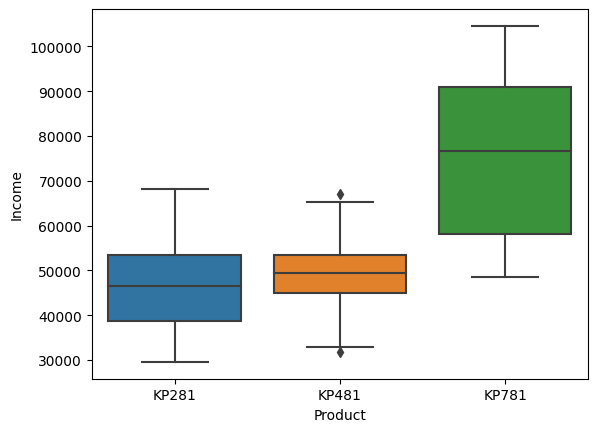

In [ ]:
sns.boxplot(x= "Product", y= "Income", data= aerofit)

<Axes: xlabel='Gender', ylabel='Income'>

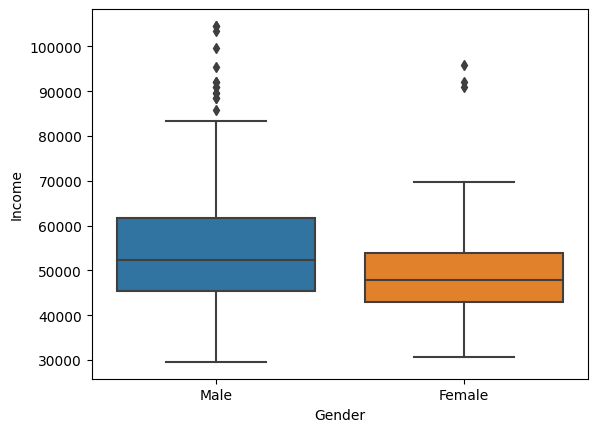

In [ ]:
sns.boxplot(x= "Gender", y= "Income", data= aerofit)

<Axes: xlabel='MaritalStatus', ylabel='Income'>

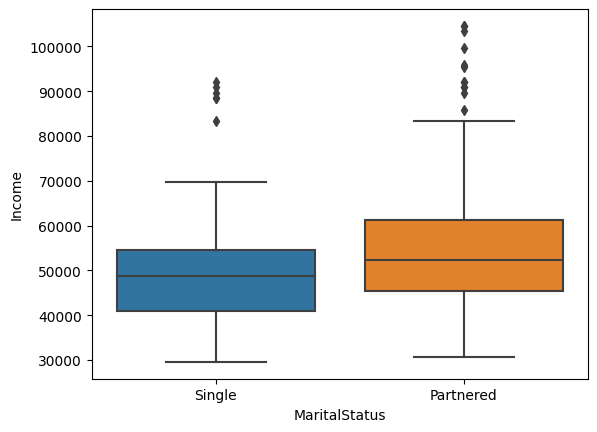

In [ ]:
sns.boxplot(x= "MaritalStatus", y= "Income", data= aerofit)

In [ ]:
aerofit["random"]= np.random.choice(["g1","g2","g3","g4"], size= len(aerofit))
aerofit.head()
# g1, g2, g3 and g4 are completely random; bass count number of rows ke barrabar hoga.

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,random
0,KP281,18,Male,14,Single,3,4,29562,112,g2
1,KP281,19,Male,15,Single,2,3,31836,75,g3
2,KP281,19,Female,14,Partnered,4,3,30699,66,g2
3,KP281,19,Male,12,Single,3,3,32973,85,g3
4,KP281,20,Male,13,Partnered,4,2,35247,47,g1


<Axes: xlabel='random', ylabel='Income'>

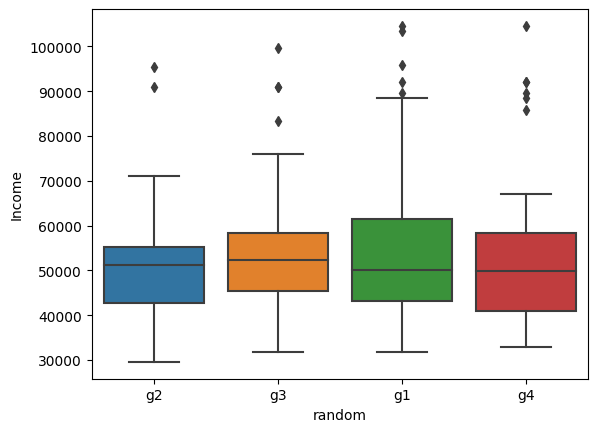

In [ ]:
sns.boxplot(x="random", y="Income", data= aerofit)

In [ ]:
aerofit_g1= aerofit[aerofit["random"]=="g1"]["Income"]
aerofit_g2= aerofit[aerofit["random"]=="g2"]["Income"]
aerofit_g3= aerofit[aerofit["random"]=="g3"]["Income"]
aerofit_g4= aerofit[aerofit["random"]=="g4"]["Income"]

In [ ]:
print(aerofit_g1.mean(), aerofit_g2.mean(), aerofit_g3.mean(), aerofit_g4.mean())
# THis assumption is very much different from original one
# And this is our H0.

55523.24444444444 51440.12903225807 54058.46153846154 53178.730769230766


In [ ]:
from scipy.stats import f_oneway, kruskal, shapiro, ttest_ind, levene
# H0= All groups have same mean
# Ha= Some groups have different mean
f_stats, p_value = f_oneway(aerofit_g1, aerofit_g2, aerofit_g3, aerofit_g4)

print(p_value)
if p_value < 0.05:
  print("reject H0\nSome groups have different mean")
else:
  print("Fail to reject H0\n same mean")

0.7545989391577366
Fail to reject H0
 same mean


In [ ]:
f_stats, p_value = kruskal(aerofit_g1, aerofit_g2, aerofit_g3, aerofit_g4)
print(p_value)
# f_oneway is ANOVA tests and if ANOVA's assumption fails; kruskal applies

0.8422976916020573


Assumptions:
a). Gaussian pattern follows
b). Independent outcomes
c). Equal variances

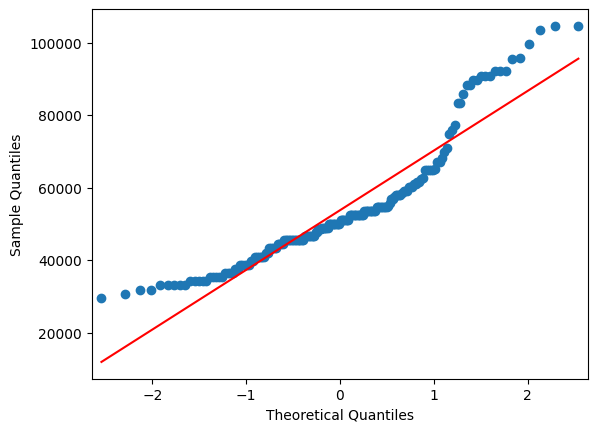

In [ ]:
'''
For Gaussian asassumption we use QQ test(visualization type) and Shapiro test(statistics based)
'''
from statsmodels.graphics.gofplots import qqplot

# QQ test

qqplot(aerofit["Income"], line="s")
plt.show()
# Here distributioin of results are not in straight line.

In [ ]:
height= pd.read_csv("weight-height.csv")

In [ ]:
heightonly= height["Height"]

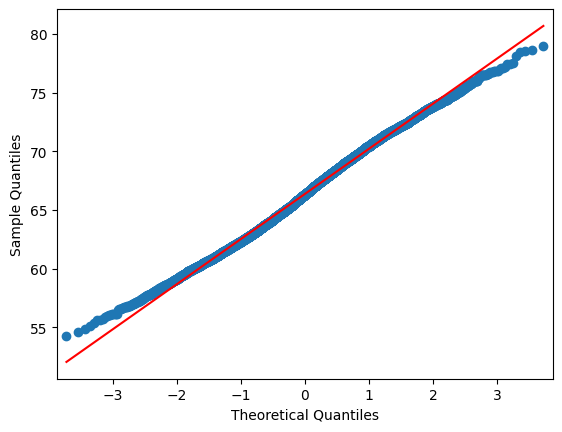

In [ ]:
qqplot(heightonly, line= "s")
plt.show()
# same trend as straight line

## Shapiro Test

In [ ]:
'''Take a few samples of data (50 to 200). This test may not work if data is too large'''
heightonly_subset= heightonly.sample(100)

In [ ]:
#H0: Data is Gaussian
#Ha: Data is not Guassian
test_stat, p_value = shapiro(heightonly_subset)

if p_value < 0.05:
  print("Reject H0")
  print("Not Gaussian")
else:
  print("Fail to reject H0")
  print("Follows Gaussian")

Fail to reject H0
Follows Gaussian


In [ ]:
# levere test- to check weather the difference in variance is  significant or by chance.

In [ ]:
ht_male= height[height["Gender"]=="Male"]["Height"]
ht_female= height[height["Gender"]=="Female"]["Height"]

In [ ]:
ht_male.var()

8.198843252520467

In [ ]:
ht_female.var()

7.2699474936701245

In [ ]:
#H0: Variances are equal
#Ha: Variances are not equal

levene_stat, p_value = levene(ht_male, ht_female)

if p_value < 0.05:
  print("Reject H0")
  print("Variance are not equal")
else:
  print("Fail to reject H0")
  print("Variance are equal")

Reject H0
Variance are not equal


'''
Summary:  
ttest --> Numerical vs Cat --> 2 categories  
Anova -> Numerical vs Cat --> more than 2 categories
  
Assumtions:
1 - gaussian: qqplot, shapiro  
2- equal variance --> levene  
3- independence  

If any of the assumtions of Anova fails, we use Kruskal wallis test

'''

DAY-90 ANOVA/ Assignment

In [ ]:
# Q-06
# H0: observation matches the expectations
# Ha: Observation does not match exp
alpha= 0.05

obs5= [45,50,55]
sum= np.sum(obs5)
exp5= [0.3*sum, 0.4*sum, 0.3*sum]
chi_stat, p_value= chisquare(obs5, exp5)

print(chi_stat)
print(p_value)

if p_value < alpha:
  print("reject H0\nObservation does not match exp")
else:
  print("Fail to reject H0\nobservation matches the expectations")

3.8888888888888893
0.1430666827544082
Fail to reject H0
observation matches the expectations


In [ ]:
# Q-05
'''
independent, Gaussian Distribution, equal variance
for Gaussian test- Shapiro test
H0: Follow Gaussian
Ha: Does not follow Gaussian
'''
college_students= [71,62,63,59,67,68,63,62,66,65,61,60]
athletes= [67,68,72,66,65,69,71,70,65,64,68]
army=[68,67,66,68,69,70,71,69,66,67]
test_stats, p_value= shapiro(army) # check for college_students and athletes also

if p_value < 0.01:
  print("Reject H0")
  print("Not Follow Gaussian")
else:
  print("Fail to reject H0")
  print("Follows Gaussian")

Fail to reject H0
Follows Gaussian


In [ ]:
# levene test
# H0: variance are equal
# Ha: Variance are not equal
college_students= np.array(college_students)
army= np.array(army)
athletes=np.array(athletes)
levene_stat, p_value= levene(college_students, athletes, army)

print(p_value)
if p_value < 0.01:
  print("Reject H0")
  print("Variance are not equal")
else:
  print("Fail to reject H0")
  print("variance are equal")

0.15689285268349706
Fail to reject H0
variance are equal


In [ ]:
college_students.var()

11.576388888888891

In [ ]:
# H0: same mean
# Ha: Different mean
f_stats, p_value = f_oneway(college_students, army, athletes)

print(p_value)
if p_value < 0.01:
  print("reject H0\nSome groups have different mean")
else:
  print("Fail to reject H0\n same mean")

0.0017534092082519943
reject H0
Some groups have different mean


In [ ]:
# Q-07
# H0: observation matches the expectations
# Ha: Observation does not match exp
alpha= 0.05

obs7= [30,85,85]
sum= np.sum(obs7)
exp7= [0.2*sum, 0.5*sum, 0.3*sum]
chi_stat, p_value= chisquare(obs7, exp7)

print(chi_stat)
print(p_value)

if p_value < alpha:
  print("reject H0\nObservation does not match exp")
else:
  print("Fail to reject H0\nobservation matches the expectations")

15.166666666666666
0.0005088621855732918
reject H0
Observation does not match exp


In [ ]:
# Q-01
'''
Assume for the independent, Gaussian Distribution, equal variance
H0: All regions have same mean expected last year
Ha: Some regions observe different mean last year
'''
a= [13,8,11,12,11]
b= [15,10,16,11,13,10]
c=[5,11,9,5]
d=[8,10,6,5,7]
f_stats, p_value= f_oneway(a,b,c,d)

print(p_value)
if p_value < 0.05:
  print("Reject H0")
  print("Some regions observe different mean last year")
else:
  print("Fail to reject H0")
  print("All regions have same mean expected last year")

0.0049302919205628576
Reject H0
Some regions observe different mean last year


In [ ]:
# Q-02
'''
Assume for the independent, Gaussian Distribution, equal variance
H0: No difference exists in mean number of pages among books in the five rating groups
Ha: Difference Exists in mean number of pages among books in the five rating groups
'''
e= [382, 391, 335, 368, 400, 372]
a= [560, 343, 512, 329, 391, 367]
b= [384, 458, 409, 309, 374, 459]
c=[325, 390, 304, 240, 306, 169]
d=[360, 298, 272, 368, 320, 326]
f_stats, p_value= f_oneway(a,b,c,d,e)

print(p_value)
if p_value < 0.01:
  print("Reject H0")
  print("Difference Exists in mean number of pages among books in the five rating groups")
else:
  print("Fail to reject H0")
  print("No difference exists in mean number of pages among books in the five rating groups")

0.009362001936328815
Reject H0
Difference Exists in mean number of pages among books in the five rating groups


In [ ]:
# Q-03
'''
Assume for the independent, Gaussian Distribution, equal variance
H0: No difference exists in mean number
Ha: Difference Exists in mean number
'''
A= [19.60, 18.82, 19.00, 18.45, 19.79, 19.03, 17.89, 19.42]
B= [21.10, 20.00, 20.43, 19.67, 18.99, 19.98, 20.14, 19.78]
C= [10.31, 10.02, 9.41, 9.89, 10.05, 10.52, 11.02, 10.42]
D=[17.02, 16.71, 17.78, 18.65, 15.98, 17.63, 17.00, 16.78, 16.92, 17.14]
f_stats, p_value= f_oneway(A,B,C,D)

print(p_value)
if p_value < 0.05:
  print("Reject H0")
  print("Difference Exists in mean number")
else:
  print("Fail to reject H0")
  print("No difference exists in mean number")

2.392149441499325e-24
Reject H0
Difference Exists in mean number


In [ ]:
# Q-04
'''
Assume for the independent, Gaussian Distribution, equal variance
H0: No difference exists in mean number
Ha: Difference Exists in mean number
'''
cars = [19.9, 15.3, 2.2, 6.8, 34.2, 8.3, 12.0, 7.0, 9.5, 1.1]
buses = [1.8, 24.6, 7.2, 37.0, 7.2, 21.2, 6.5, 23.6]
trucks = [13.3, 23.0, 25.4, 15.3, 57.1, 14.5, 26.0]
f_stats, p_value= f_oneway(cars, buses, trucks)

print(p_value)
if p_value < 0.07:
  print("Reject H0")
  print("Difference Exists in mean number")
else:
  print("Fail to reject H0")
  print("No difference exists in mean number")

0.10782985675757563
Fail to reject H0
No difference exists in mean number


## Correlation/ Assignments

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr

Advance Distributions/ Poissions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, geom, norm, poisson, expon

In [ ]:
poisson.pmf(k=1, mu=2)

0.2706705664732254

In [ ]:
poisson.pmf(k=0, mu=1)

0.36787944117144233

In [ ]:
poisson.pmf(k= 3, mu= (4/3))

0.10413714098399081

In [ ]:
expon.cdf(x= 6, scale= 15)

0.3296799539643607

Assignment

In [ ]:
# Q-01
# 03 failure in every 20 weeks
rate= 3/20
rate # per week failure
poisson.cdf(k=1, mu= rate)

0.9898141728888165

In [ ]:
# Q-02
#
poisson.pmf(k=240, mu=240)

0.025742673493104554

In [ ]:
poisson.pmf(k=1, mu= 2)

0.2706705664732254

In [ ]:
# Q-03
'''
per acre number of trees= 74
per quarter acre no. of trees= 74/4
'''
R= 74/4
poisson.cdf(mu= R, k= 15)

0.24902769151284776

In [ ]:
1 - poisson.cdf(mu=R, k=6)

0.9992622541111789

In [ ]:
# Q - 04
# mu= np ; n= number of sample and p=sucess probability
p= 1/365
# n= 500 #(including me), so
n= 499
mu= n*p
poisson.pmf(k=1, mu= mu) # exact one match

0.34839633781319934

In [ ]:
# Q-05
mu= 0.0002*15000
print(poisson.pmf(k=0, mu=mu), mu)
# default sequence is (k, mu)

0.049787068367863944 3.0


In [ ]:
# Q- 08 of  Day-91
from scipy.stats import ttest_rel
before= [2.45, 0.69, 1.80, 2.80, 0.07, 1.67, 2.93, 0.47, 1.45, 1.34]
after = [7.71, 2.17, 5.65, 8.79, 0.23, 5.23, 9.19, 1.49, 4.56, 4.20]

# H0: No improvement
# Ha: improvement occurs
t_stat, p_value= ttest_rel(before, after, alternative= "less")
print(t_stat, p_value)

alpha= 0.05

-5.111096450191605 0.00031778119819482275


In [ ]:
# Q-2 Day 94
expon.cdf(x=5, scale=5) - expon.cdf(x=4, scale=5)

0.08144952294577923

In [ ]:
# Q-3 Day 94
1- expon.cdf(scale= 1000, x= 600)

0.5488116360940264

In [ ]:
# Q-5 day 94
1 - expon.cdf(scale= 2, x= 6)

0.04978706836786395

In [ ]:
# Q-4 Day 94
1 - expon.cdf(scale= 6, x= 4)

0.513417119032592

##Feature Engineering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()
# 05 columns with int/ float values but initially "dependents" are also looks like to have int/ float entry.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.describe(include= ["object"])
# This is used to describe the "object" columns

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df["Dependents"].unique()
# ohk due to this 3+

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
# For Nan variables
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
cat_col= df.dtypes == "object"
cat_col= list(cat_col[cat_col].index)
cat_col

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
cat_num= df.dtypes != "object"
cat_num= list(cat_num[cat_num].index)
cat_num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
df["Gender"].dropna(inplace=True)

In [ ]:
df.shape

(614, 13)

In [ ]:
# cat_col and cat_num are the Features of the target variable. Here
# target variable is Loan Status.
# Status of Load is independent of column Loan Id, so Id also removed.
cat_col.remove("Loan_Status")

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 [Text(-10000.0, 0, '−10000'),
  Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000'),
  Text(60000.0, 0, '60000'),
  Text(70000.0, 0, '70000'),
  Text(80000.0, 0, '80000'),
  Text(90000.0, 0, '90000')])

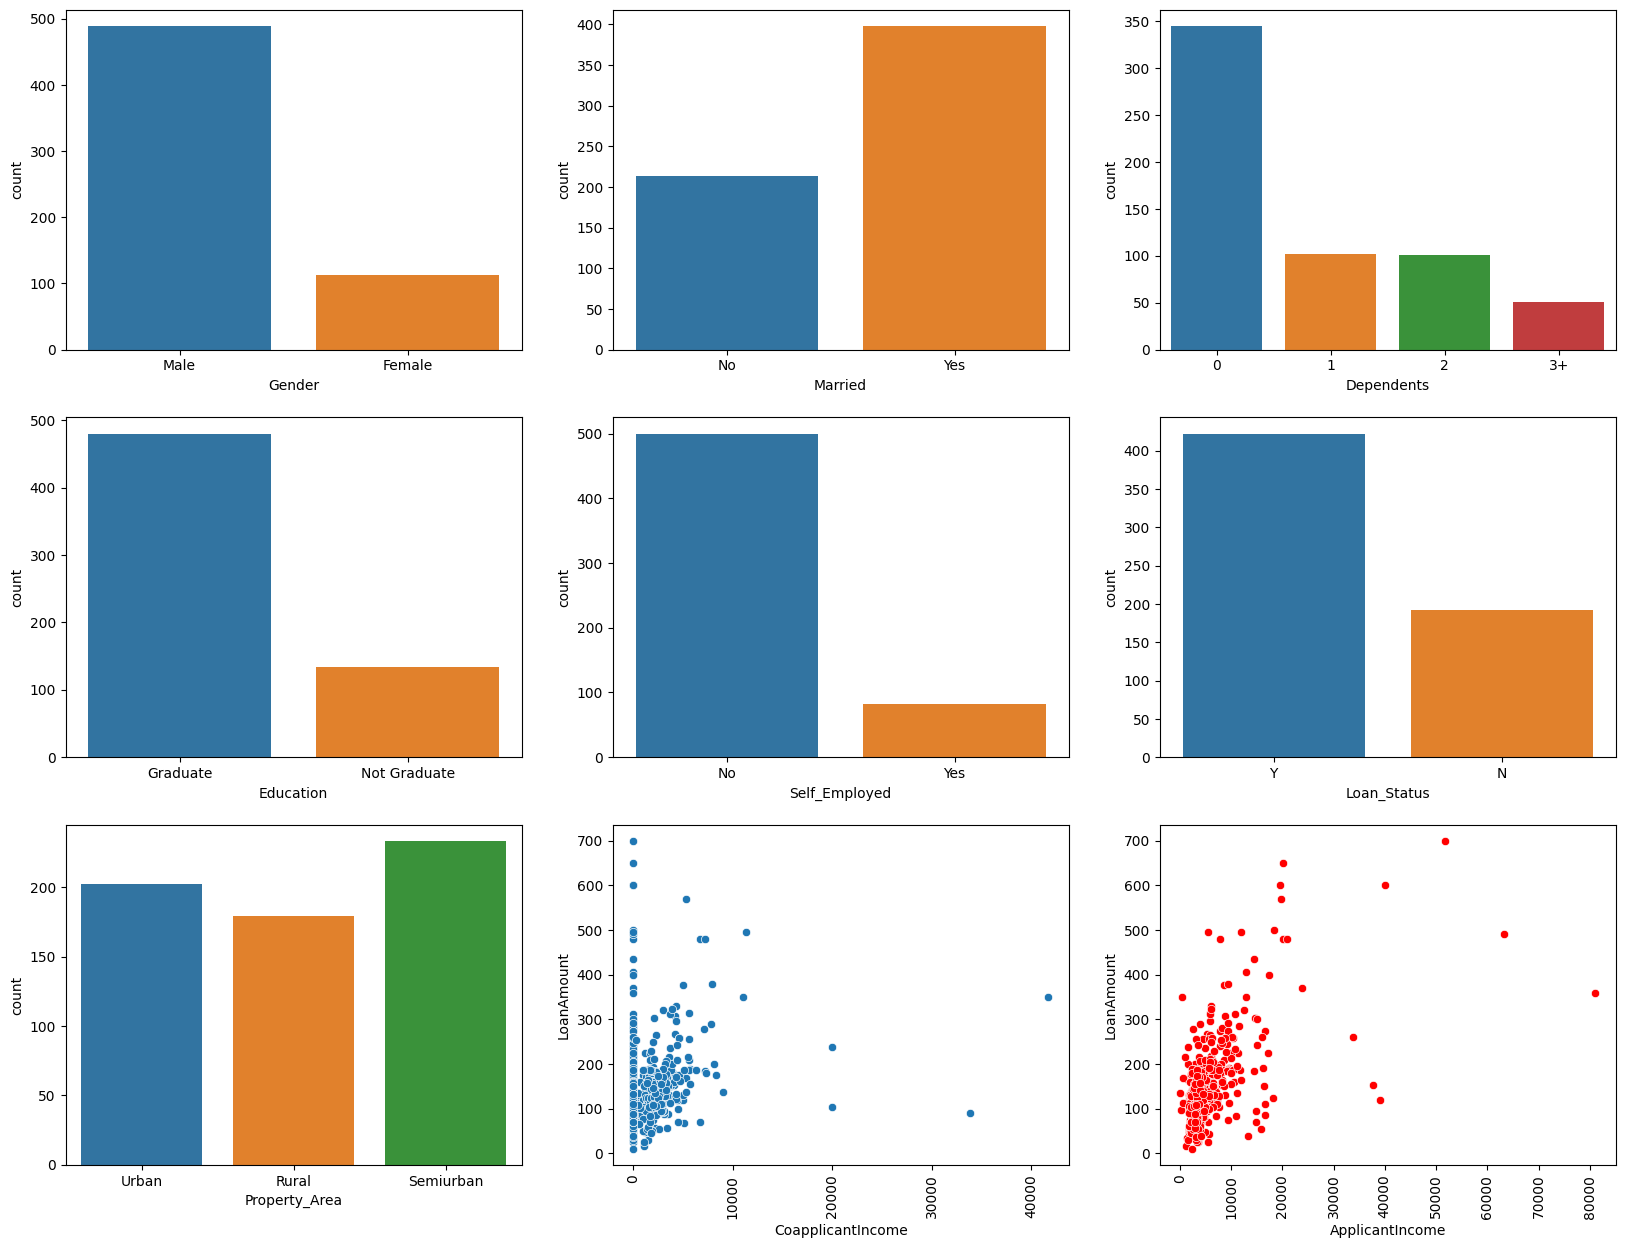

In [ ]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.countplot(x="Gender", data=df)
plt.subplot(3,3,2)
sns.countplot(x="Married", data=df)
plt.subplot(3,3,3)
sns.countplot(x="Dependents", data=df)
plt.subplot(3,3,8)
sns.scatterplot(x="CoapplicantIncome", y="LoanAmount", data=df)
plt.xticks(rotation= 90)
plt.subplot(3,3,4)
sns.countplot(x="Education", data=df)
plt.subplot(3,3,5)
sns.countplot(x="Self_Employed", data=df)
plt.subplot(3,3,6)
sns.countplot(x="Loan_Status", data=df)
plt.subplot(3,3,7)
sns.countplot(x="Property_Area", data=df)
plt.subplot(3,3,9)
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=df, color= "Red")
plt.xticks(rotation= 90)

In [ ]:
df.drop(columns=["Loan_Status","Loan_ID"], axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.groupby("Loan_Status")["CoapplicantIncome"].aggregate("mean")
# counter answer

Loan_Status
N    1877.807292
Y    1504.516398
Name: CoapplicantIncome, dtype: float64

In [ ]:
df.groupby("Loan_Status")["ApplicantIncome"].aggregate("mean")
# counter answer

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [ ]:
df.groupby("Loan_Status")["LoanAmount"].aggregate("mean")
# It seems some how favourable

Loan_Status
N    151.220994
Y    144.294404
Name: LoanAmount, dtype: float64

In [ ]:
df.groupby("Loan_Status")["Loan_Amount_Term"].aggregate("mean")

Loan_Status
N    344.064516
Y    341.072464
Name: Loan_Amount_Term, dtype: float64

In [ ]:
# Individually cant be concluded ki what is the reason for the "Yes" and "No"
from scipy.stats import ttest_ind
# H0: Only Income is not respensible for Status
# Ha: Income and Status are dependent
Sample1= df.loc[df["Loan_Status"]=="Y"]["ApplicantIncome"]
Sample2= df.loc[df["Loan_Status"]=="N"]["ApplicantIncome"]

ttest, p_value= ttest_ind(Sample1, Sample2)
# With 95% CI i.e. a=0.05
print(p_value)
if p_value<0.05:
  print("reject H0\nIncome and Status are dependent")
else:
  print("Only Income is not responsible for Status")

0.907287812130518
Only Income is not responsible for Status


In [ ]:
# How to make countinuous attribute/ variable to discrete one
# By using bins/ buckets/ pd.cut
bins= [0,20000, 40000, 60000, 81000]
slabs= ["samsung_guru", "RedmI", "One_plus", "iphone"]
df["Income_slabs"]= pd.cut(df["ApplicantIncome"], bins, labels=slabs)

In [ ]:
df["Income_slabs"].value_counts()

samsung_guru    602
RedmI             9
iphone            2
One_plus          1
Name: Income_slabs, dtype: int64

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_slabs
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,samsung_guru
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,samsung_guru
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,samsung_guru
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,samsung_guru
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,samsung_guru


In [ ]:
Sample3= pd.crosstab(df["Income_slabs"], df["Loan_Status"])

In [ ]:
# Same analysis by using chi2_contingency
from scipy.stats import chi2_contingency
chi_stat, p_value, exp_freq= chi2_contingency(Sample3)
print(chi_stat)
print(p_value)
print(exp_freq)

ValueError: ignored

In [ ]:
df["Total_income"]= df["ApplicantIncome"] + df["CoapplicantIncome"]

In [ ]:
df["Loan_Amount_Term"]= (df["Loan_Amount_Term"]/12).astype("float")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_slabs,Total_income,emi
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,samsung_guru,5849.0,194.966667
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,samsung_guru,6091.0,203.033333
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,samsung_guru,3000.0,100.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,samsung_guru,4941.0,164.700000
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,samsung_guru,6000.0,200.000000


In [ ]:
df["Loan_amount_per_yr"]= df["LoanAmount"]/df["Loan_Amount_Term"]

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_slabs,Total_income,emi,Loan_amount_per_yr
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,samsung_guru,5849.0,194.966667,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,samsung_guru,6091.0,203.033333,4.266667
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,samsung_guru,3000.0,100.000000,2.200000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,samsung_guru,4941.0,164.700000,4.000000
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,samsung_guru,6000.0,200.000000,4.700000


In [ ]:
df["Monthly_income"]= df["Total_income"]/12
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_slabs,Total_income,emi,Loan_amount_per_yr,Monthly_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,samsung_guru,5849.0,194.966667,NaN,487.416667
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,samsung_guru,6091.0,203.033333,4.266667,507.583333
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,samsung_guru,3000.0,100.000000,2.200000,250.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,samsung_guru,4941.0,164.700000,4.000000,411.750000
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,samsung_guru,6000.0,200.000000,4.700000,500.000000


In [ ]:
df["emi"]= df["Loan_amount_per_yr"]*1000/12
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_slabs,Total_income,emi,Loan_amount_per_yr,Monthly_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,samsung_guru,5849.0,NaN,NaN,487.416667
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,samsung_guru,6091.0,355.555556,4.266667,507.583333
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,samsung_guru,3000.0,183.333333,2.200000,250.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,samsung_guru,4941.0,333.333333,4.000000,411.750000
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,samsung_guru,6000.0,391.666667,4.700000,500.000000


In [ ]:
df["Aukaat"]= (df["Monthly_income"]*0.35 >= df["emi"]).astype("int")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_slabs,Total_income,emi,Loan_amount_per_yr,Monthly_income,Aukaat
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,samsung_guru,5849.0,NaN,NaN,487.416667,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,samsung_guru,6091.0,355.555556,4.266667,507.583333,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,samsung_guru,3000.0,183.333333,2.200000,250.000000,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,samsung_guru,4941.0,333.333333,4.000000,411.750000,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,samsung_guru,6000.0,391.666667,4.700000,500.000000,0


In [ ]:
pd.crosstab(df["Aukaat"], df["Loan_Status"])
# But it seems wrong bcoz of difference between Loan Status and Aukaat
# May be Total_income given per Month not Per year

Loan_Status,N,Y
Aukaat,,
0,186,404
1,6,18


In [ ]:
df.drop(["Monthly_income"], axis=1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_slabs,Total_income,emi,Loan_amount_per_yr,Aukaat
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,samsung_guru,5849.0,NaN,NaN,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,samsung_guru,6091.0,355.555556,4.266667,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,samsung_guru,3000.0,183.333333,2.200000,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,samsung_guru,4941.0,333.333333,4.000000,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,samsung_guru,6000.0,391.666667,4.700000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,Y,samsung_guru,2900.0,197.222222,2.366667,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,Y,samsung_guru,4106.0,222.222222,2.666667,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,Y,samsung_guru,8312.0,702.777778,8.433333,0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,Y,samsung_guru,7583.0,519.444444,6.233333,0


In [ ]:
df["Aukaat"]= (df["Total_income"]*0.35 >= df["emi"]).astype("int")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_slabs,Total_income,emi,Loan_amount_per_yr,Monthly_income,Aukaat
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,samsung_guru,5849.0,NaN,NaN,487.416667,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,samsung_guru,6091.0,355.555556,4.266667,507.583333,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,samsung_guru,3000.0,183.333333,2.200000,250.000000,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,samsung_guru,4941.0,333.333333,4.000000,411.750000,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,samsung_guru,6000.0,391.666667,4.700000,500.000000,1


In [ ]:
pd.crosstab(df["Aukaat"], df["Loan_Status"])

Loan_Status,N,Y
Aukaat,,
0,19,21
1,173,401


In [ ]:
chi2_contingency(pd.crosstab(df["Aukaat"], df["Loan_Status"]))
# It comes 0.034 as p_values which is less then 0.05.

Chi2ContingencyResult(statistic=4.467271867611989, pvalue=0.03455011506195388, dof=1, expected_freq=array([[ 12.50814332,  27.49185668],
       [179.49185668, 394.50814332]]))

In [ ]:
# Reject H0: Loan Status Dependent on Aukaat(ApplicantIncome, Coapplicantincome, Loan amount term and Loan Amount)

In [ ]:
# Q-05/ Day-97
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Programming Questions:- Python Lib Interview/ Reference datasets

In [ ]:
df.groupby(["Gender","Married"])["ApplicantIncome"].aggregate("mean")

Gender  Married
Female  No         4503.787500
        Yes        4829.645161
Male    No         5236.146154
        Yes        5529.540616
Name: ApplicantIncome, dtype: float64

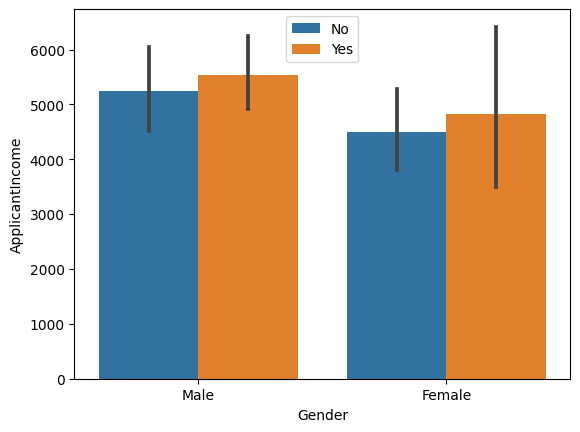

In [ ]:
sns.barplot(data= df, x= "Gender", y= "ApplicantIncome", hue="Married")
plt.legend(loc= "best")

In [ ]:
df.groupby(["Gender","Married"])["ApplicantIncome"].aggregate("max")

Gender  Married
Female  No         18165
        Yes        19484
Male    No         37719
        Yes        81000
Name: ApplicantIncome, dtype: int64

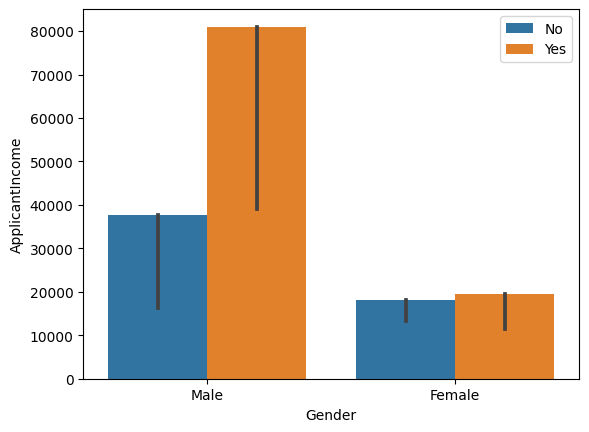

In [ ]:
sns.barplot(data= df, x= "Gender", y= "ApplicantIncome", hue="Married", estimator= "max")
plt.legend(loc= "best")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_slabs,Total_income,emi,Loan_amount_per_yr,Monthly_income,Aukaat
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,samsung_guru,5849.0,NaN,NaN,487.416667,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,samsung_guru,6091.0,355.555556,4.266667,507.583333,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,samsung_guru,3000.0,183.333333,2.200000,250.000000,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,samsung_guru,4941.0,333.333333,4.000000,411.750000,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,samsung_guru,6000.0,391.666667,4.700000,500.000000,1


Assignment Feature Engineer-I & II

In [ ]:
# Q-1/ Day-97
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, ttest_1samp, chi2_contingency, chisquare
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
loan= pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/018/746/original/loan.csv?1666170299.csv")

In [ ]:
Unmarried_men= loan.loc[(loan["Gender"]=="Male") & (loan["Married"]=="No")][["ApplicantIncome"]]
women= loan.loc[loan["Gender"]=="Female"][["ApplicantIncome"]]
Unmarried_men

,ApplicantIncome
0,5849
4,6000
13,1853
15,4950
16,3596
...,...
579,3182
581,1836
595,3833
597,2987


In [ ]:
'''H0: same income groups
Ha: Different Income groups
'''
t_stat, p_value = ttest_ind(Unmarried_men, women)
print(t_stat, p_value)

if p_value < 0.05:
  print("reject H0\nDifferent Income groups")
else:
  print("Same income groups")

[1.1403012] [0.2552975]
Same income groups


In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
Grad_unmarr_men= loan.loc[(loan["Married"]=="No") & (loan["Education"]=="Graduate") & (loan["Gender"]=="Male")][["ApplicantIncome"]]
Grad_women= loan.loc[(loan["Education"]=="Graduate") & (loan["Gender"]=="Female")][["ApplicantIncome"]]

In [ ]:
Grad_women.head()

,ApplicantIncome
17,3510
29,3750
37,3667
45,3410
48,2645


In [ ]:
# Q-2/ Day-97
'''H0: same income groups
Ha: Different Income groups
'''
t_stat, p_value = ttest_ind(Grad_unmarr_men, Grad_women)
print(t_stat, p_value)

if p_value < 0.05:
  print("reject H0\nDifferent Income groups")
else:
  print("Same income groups")

[1.75360895] [0.08111856]
Same income groups


In [ ]:
# Q-3/ Day-97
loan_mark1= (loan["Married"]=="No") & (loan["Education"]=="Graduate") & (loan["Gender"]=="Male")
loan_mark2= (loan["Education"]=="Graduate") & (loan["Gender"]=="Female")

In [ ]:
loan_mark1.value_counts()

False    515
True      99
dtype: int64

In [ ]:
loan_mark2.value_counts()

False    522
True      92
dtype: int64

In [ ]:
'''H0: No conclusion regarding Graduate unmarried men can get loan easily wrt Graduate women
Ha: Graduate unmarried men can get loan easily wrt Graduate women
'''
crosstab= pd.crosstab(index= loan_mark1, columns= loan_mark2)
print(crosstab)

chi2_contingency(crosstab)
print(p_value)
if p_value < 0.05:
  print("reject H0\nDifferent Income groups")
else:
  print("Same income groups")

col_0  False  True 
row_0              
False    423     92
True      99      0
[0.08111856]
Same income groups


In [ ]:
'''
H0: The likelihood of getting a loan is equal for both groups.
Ha: The likelihood of getting a loan is not equal for both groups.
'''
# Add a column indicating that the entry contains graduate and unmarried men
loan['GraduateUnmarriedMen'] = (loan["Gender"] == "Male") & (loan["Married"] == "No") & (loan["Education"] == "Graduate") # this gives true/ false
graduate_unmarried_men = loan[(loan['GraduateUnmarriedMen'] == True)]
print('Number of graduate married men datapoints:',len(graduate_unmarried_men))

# Add a column indicating that the entry contains graduate and unmarried men
loan['GraduateWomen'] = (loan["Gender"] == "Female") & (loan["Education"] == "Graduate")
graduate_women = loan[(loan["GraduateWomen"] == True)]
print('Number of graduate women datapoints:',len(graduate_women))

data = loan[(loan['GraduateUnmarriedMen'] == True) | (loan['GraduateWomen'] == True)]

# Perform a chi-square test since the loan_Status is a categorical variable.
contingency = pd.crosstab(data['GraduateUnmarriedMen'], data['Loan_Status'])
print('\n',contingency,'\n')
p_value = chi2_contingency(contingency)[1]
print('p-value:',round(p_value,2))

if p_value > 0.05:
 print('Since p_value > 0.05 we fail to reject the null hypothesis.')

else:
 print('Since p_value < 0.05 we reject the null hypothesis.')

Number of graduate married men datapoints: 99
Number of graduate women datapoints: 92

 Loan_Status            N   Y
GraduateUnmarriedMen        
False                 31  61
True                  37  62 

p-value: 0.7
Since p_value > 0.05 we fail to reject the null hypothesis.


In [ ]:
data.shape

(191, 15)

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,GraduateUnmarriedMen,GraduateWomen
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,True,False
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,True,False
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N,True,False
15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y,True,False
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N,False,True


In [ ]:
loan.info()
# Dependent is "object" which has to be "int"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               614 non-null    object 
 1   Gender                601 non-null    object 
 2   Married               611 non-null    object 
 3   Dependents            599 non-null    object 
 4   Education             614 non-null    object 
 5   Self_Employed         582 non-null    object 
 6   ApplicantIncome       614 non-null    int64  
 7   CoapplicantIncome     614 non-null    float64
 8   LoanAmount            592 non-null    float64
 9   Loan_Amount_Term      600 non-null    float64
 10  Credit_History        564 non-null    float64
 11  Property_Area         614 non-null    object 
 12  Loan_Status           614 non-null    object 
 13  GraduateUnmarriedMen  614 non-null    bool   
 14  GraduateWomen         614 non-null    bool   
dtypes: bool(2), float64(4),

In [ ]:
# To make "Dependents" column int/ float
loan["Dependents"].replace("3+", 3, inplace= True)

In [ ]:
loan["Dependents"].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [ ]:
loan.isna().sum()
# First we have to treat these NaN then only we can perform other basic functions.

Loan_ID                  0
Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed           32
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              22
Loan_Amount_Term        14
Credit_History          50
Property_Area            0
Loan_Status              0
GraduateUnmarriedMen     0
GraduateWomen            0
dtype: int64

In [ ]:
Category_col=[]
Category_col.append(loan.dtypes == "object")
Category_col
# Then further we have to apply filter separately

[Loan_ID                  True
 Gender                   True
 Married                  True
 Dependents               True
 Education                True
 Self_Employed            True
 ApplicantIncome         False
 CoapplicantIncome       False
 LoanAmount              False
 Loan_Amount_Term        False
 Credit_History          False
 Property_Area            True
 Loan_Status              True
 GraduateUnmarriedMen    False
 GraduateWomen           False
 dtype: bool]

In [ ]:
Category_col= loan.dtypes=="object"
Category_col= list(Category_col[Category_col].index)
Category_col

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
Numerical_col= loan.dtypes != "object"
Numerical_col= list(Numerical_col[Numerical_col].index)
Numerical_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'GraduateUnmarriedMen',
 'GraduateWomen']

In [ ]:
loan["Gender"].value_counts()
# With 13 NaNs
relation1= pd.crosstab(loan["Gender"], loan["Loan_Status"])
relation1

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [ ]:
chi2_contingency(relation1)

Chi2ContingencyResult(statistic=0.13962612116543877, pvalue=0.7086529816451106, dof=1, expected_freq=array([[ 34.84858569,  77.15141431],
       [152.15141431, 336.84858569]]))

In [ ]:
loan["Gender"]= loan["Gender"].fillna("Others")
relation2= pd.crosstab(loan["Gender"], loan["Loan_Status"])
chi2_contingency(relation2)
# Value of p_value is change now.

Chi2ContingencyResult(statistic=0.5558960103285638, pvalue=0.7573361980618397, dof=2, expected_freq=array([[ 35.0228013 ,  76.9771987 ],
       [152.91205212, 336.08794788],
       [  4.06514658,   8.93485342]]))

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# Q-04/ Day- 97


In [ ]:
num_miss_mu= ["Loan_Amount_Term", "LoanAmount"]
mean_imputer= SimpleImputer(strategy= "mean")
for col in num_miss_mu:
  loan[col]= pd.DataFrame(mean_imputer.fit_transform(pd.DataFrame(loan[col])))

In [ ]:
num_miss_median= ["Credit_History"]
median_imputer= SimpleImputer(strategy= "median")
for col in num_miss_median:
  loan[col]= pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(loan[col])))

In [ ]:
Cat_missing= ["Married", "Dependents", "Self_Employed"]
freq_imputer= SimpleImputer(strategy= "most_frequent") # mode
for col in Cat_missing:
  loan[col]= pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(loan[col])))

In [ ]:
loan.isna().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
GraduateUnmarriedMen    0
GraduateWomen           0
dtype: int64

In [ ]:
loan["Dependents"]= loan["Dependents"].astype("int")

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               614 non-null    object 
 1   Gender                614 non-null    object 
 2   Married               614 non-null    object 
 3   Dependents            614 non-null    int64  
 4   Education             614 non-null    object 
 5   Self_Employed         614 non-null    object 
 6   ApplicantIncome       614 non-null    int64  
 7   CoapplicantIncome     614 non-null    float64
 8   LoanAmount            614 non-null    float64
 9   Loan_Amount_Term      614 non-null    float64
 10  Credit_History        614 non-null    float64
 11  Property_Area         614 non-null    object 
 12  Loan_Status           614 non-null    object 
 13  GraduateUnmarriedMen  614 non-null    bool   
 14  GraduateWomen         614 non-null    bool   
dtypes: bool(2), float64(4),

In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,GraduateUnmarriedMen,GraduateWomen
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,True,False
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,False,False
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,False,False
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,False,False
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,True,False


In [ ]:
pd.crosstab(loan["Property_Area"], loan["Loan_Status"], normalize= "index")

Loan_Status,N,Y
Property_Area,,
Rural,0.385475,0.614525
Semiurban,0.231760,0.768240
Urban,0.341584,0.658416


In [ ]:
# Day-100/ Q-5
#loan.head()
loan["rejected_CH_as_One"]= (loan["Loan_Status"] == "N") & (loan["Credit_History"] == 1.0)
rejected_CH_as_One = loan[(loan["rejected_CH_as_One"] == True)] # Also can be acheived by using loan.loc
rejected_CH_as_One.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,GraduateUnmarriedMen,GraduateWomen,rejected_CH_as_One
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,False,False,True
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,False,False,True
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N,True,False,True
18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N,False,False,True
24,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151.0,360.0,1.0,Semiurban,N,False,False,True


In [ ]:
rejected_CH_as_One["Gender"].value_counts()

Male      87
Female    21
Others     2
Name: Gender, dtype: int64

In [ ]:
pd.crosstab(rejected_CH_as_One["Gender"],rejected_CH_as_One["rejected_CH_as_One"])
# But here only one variable is present named as "True", so chisquare used.

rejected_CH_as_One,True
Gender,
Female,21
Male,87
Others,2


In [ ]:
chi2_contingency(pd.crosstab(rejected_CH_as_One["Gender"],rejected_CH_as_One["rejected_CH_as_One"]))
print(p_value)
# Reject the null hypothesis and conclude for the more likeliness to be male/ female

[2.66505328e-24]


In [ ]:
'''Null hypothesis (H0): the features are independent.
Alternate hypothesis (Ha) : the features are dependent.
'''
# data of all the rejected applicants
chn = loan[(loan["Loan_Status"] == "N")]

#contingency table
contingency = pd.crosstab(chn['Gender'], chn['Credit_History'])
print(contingency)

#p-value
print('p-value:', round(chi2_contingency(contingency)[1],3))

if p_value > 0.05:
 print('Since p_value > 0.05, we fail to reject the null hypothesis.')
else:
 print('Since p_value < 0.05, we reject the null hypothesis.')

Credit_History  0.0  1.0
Gender                  
Female           16   21
Male             63   87
Others            3    2
p-value: 0.724
Since p_value < 0.05, we reject the null hypothesis.


In [ ]:
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=0.646082818960868, pvalue=0.7239438756074648, dof=2, expected_freq=array([[15.80208333, 21.19791667],
       [64.0625    , 85.9375    ],
       [ 2.13541667,  2.86458333]]))

In [ ]:
# Day-97/ Q-4
loan["new_feature"]= loan["ApplicantIncome"] + 3*loan["LoanAmount"] + 7000*loan["Credit_History"]
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,GraduateUnmarriedMen,GraduateWomen,rejected_CH_as_One,new_feature
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,True,False,False,13288.236486
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,False,False,True,11967.000000
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,False,False,False,10198.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,False,False,False,9943.000000
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,True,False,False,13423.000000


In [ ]:
bins= [0, 0.25*(np.mean(loan["new_feature"])), np.max(loan["new_feature"])] # np.mean(dataframe["col"] or dataframe["col"].mean())
slabs= ["cat-I", "cat-II"]
loan["separator"] = pd.cut(loan["new_feature"], bins, labels= slabs)

In [ ]:
table=pd.crosstab(loan["separator"], loan["Loan_Status"])

In [ ]:
chi2_contingency(table)

Chi2ContingencyResult(statistic=21.556348603572438, pvalue=3.4358343189357876e-06, dof=1, expected_freq=array([[  5.00325733,  10.99674267],
       [186.99674267, 411.00325733]]))

In [ ]:
chi2_contingency(table)[1]

3.4358343189357876e-06

In [ ]:
loan["new_feature"].mean()

11828.037789418084

In [ ]:
loan['NewFeature'] = (loan["ApplicantIncome"]) + (3 * loan["LoanAmount"]) + (7000 * loan["Credit_History"])
loan['Separator'] = loan['NewFeature'] > (loan['NewFeature'].mean()*0.25)

# Perform a chi-square test since the incomes are a continuous variable.
contingency = pd.crosstab(loan['Separator'], loan['Loan_Status'])
print(contingency)

# p-value calculation
p_value = chi2_contingency(contingency)[1]
print('p-value:',round(p_value,5))

Loan_Status    N    Y
Separator            
False         14    2
True         178  420
p-value: 0.0


In [ ]:
loan= pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/018/746/original/loan.csv?1666170299.csv")

In [ ]:
loan.dropna(inplace= True)
loan["new_feature"]= loan["ApplicantIncome"] + 3*loan["LoanAmount"] + 7000*loan["Credit_History"]
bins= [0, 0.25*(np.mean(loan["new_feature"])), np.max(loan["new_feature"])] # np.mean(dataframe["col"] or dataframe["col"].mean())
slabs= ["cat-I", "cat-II"]
loan["separator"] = pd.cut(loan["new_feature"], bins, labels= slabs)
table=pd.crosstab(loan["separator"], loan["Loan_Status"])
chi2_contingency(table)
print(p_value)

3.4358343189357876e-06


In [ ]:
table

Loan_Status,N,Y
separator,,
cat-I,11,2
cat-II,137,330


DAV-III TEST

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, chi2_contingency, chisquare, f_oneway, kruskal, shapiro, levene, binom, geom, norm, poisson, expon

In [6]:
# ANOVA
'''
H0: Mean recovery time is same for all groups
Ha: Mean recovery time is different for different groups
'''
d1= [13,10,11,10,13,10,12,10,11,10,13,11,12,9,12]
d2= [10,8,10,10,9,9,7,12,14,12,12,14,14,11,13]
d3= [11,10,9,8,13,9,7,11,10,9,12,8,14,11,14]

p_value= f_oneway(d1, d2, d3)[1] # for p_value
print(p_value.round(3))
if p_value < 0.05:
  print("reject H0 i.e. Mean recovery time is different for different groups")
else:
  print("fail to reject H0 i.e. Mean recovery time is same for all groups")

0.552
fail to reject H0 i.e. Mean recovery time is same for all groups


In [19]:
# Ttest
'''
H0: Cellphone has same mean battery life.
Ha: Battery lifes are different for the Cellphones.
'''

C1= np.array([26.04,25.12,27.31,25.03,25.06,27.53,25.19,26.6,24.17,27.76])
C2= np.array([27.08,26.13,27.64,26.19,28.71,28.63,27.96,28.62,26.21,28.31])
mu1= np.mean(C1)
mu2= np.mean(C2)
print(mu1,mu2)

t_stats, p_value= ttest_ind(C2, C1, alternative= "greater")
if p_value < 0.05:
  print(p_value, "reject H0 i.e. Battery lifes are different for the Cellphones")
else:
  print("fail to reject H0 i.e. Cellphone has same mean battery life")

25.981 27.547999999999995
0.003768931730051769 reject H0 i.e. Battery lifes are different for the Cellphones


In [24]:
# Ttest_rel
'''
H0: Drug has no effect on IQ
Ha: Drug improves the IQ of patients
'''
iq1= [101,124,89,57,135,98,69,105,114,106,97,121,93,116,102,71,88,108,144,99]
iq2= [113,127,89,70,127,104,69,127,115,99,104,120,95,129,106,71,94,112,154,96]

t_stat, p_value= ttest_rel(iq1, iq2, alternative="less") # ive statistic means iq1 < iq2 and p_value < 0.1 means reject H0
print(p_value)
if p_value < 0.1:
  print("reject H0 i.e. Drug improves the IQ of patients")
else:
  print("Drug has no effect on IQ")

0.009079862169696327
reject H0 i.e. Drug improves the IQ of patients


In [ ]:
# chisquare- absent count impact wrt days
obs= [15,17,12,10,6]
mu= np.mean(obs)
chisquare(obs)

Power_divergenceResult(statistic=6.166666666666667, pvalue=0.1870424495382044)

In [ ]:
# Ztest
# H0: average is 21.5 kmpl, Ha: average is less than 21.5 kmpl
a= 0.01
z= (20.42-21.5)/(2.7/np.sqrt(45))
p_value= norm.cdf(z)
print(p_value)

if p_value < a:
  print("reject H0")
else:
  print("fail to reject H0")

0.0036451790457678658
reject H0


In [11]:
# Ztest
'''
H0: No preference of online shopping over offline
Ha: Significance preference of online shopping over offline
'''

a= 0.05
z= (0.48-0.5)/(0.03/np.sqrt(100))
p_value= norm.cdf(z)
print(p_value)

if p_value < a:
  print("reject H0 i.e. Significance preference of online shopping over offline")
else:
  print("fail to reject H0 i.e. No preference of online shopping over offline")

1.3083924686052467e-11
reject H0 i.e. Significance preference of online shopping over offline
